# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

#set colors
colors = sns.color_palette("flare")
cmap = ListedColormap(colors)

# **Loading Data**

In [ ]:
data = pd.read_csv("/content/marketing_campaign.csv",sep='\t')
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

# **Check info dan summary data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

# **Data Cleaning**

Check duplicate and missing value

In [ ]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
data.duplicated().sum()

0

Berdasarkan output pada cek missing value, didapati bahwa terdapat missing value pada variabel income. Pada pengecekan data duplikat, tidak ditemui duplikasi data.

#  **Handling missing value**

In [ ]:
#remove missing values
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

# **Feature engineering**

Berdasarkan data understanding dan check unique values pada data, didapatkan bahwa:



*   Melalui variabel Year_birth kita dapat membuat variabel age
*   Variabel Education memiliki 5 unique values, lima kategori tersebut akan dibagi menjadi 3 kategori yaitu undergraduate, graduate, dan post graduate
*   MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts,MntGoldProds merupakan pengeluaran untuk pembelian produk (berdasarkan jenis produk). Berdasarkan variabel tersebut kita dapat membuat variabel spent dengan menumlahkan variabel-variabel tersebut.
*   Berdasarkan variabel Marital_status, kita dapat membuat variabel living_with dimana dari variabel tersebut kita mengetaui informasi apakah pelanggan memenuhi kebutuhannya sendiri atau dengan keluarganya
*   Berdasarkan variabel Kidhome dan Teenhome kita dapat membuat variabel baru yaitu children, dengan menjumlahkan kidhome dan teenhome values
*   Variabel living dan children dapat kita gabungkan menjadi variabel family_size dengan menjumlahkan living dan children values
*    Untuk mengetahui apakah seseorang merupakan orang tua maka dibuat variabel is_parent berdasarkan data children

In [ ]:
#Feature Engineering
#Age of customer today
data["Age"] = 2023-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

<ipython-input-11-aa48afa16836>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = 2023-data["Year_Birth"]
<ipython-input-11-aa48afa16836>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
<ipython-input-11-aa48afa16836>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0   172      88  ...             0             0         0         1   66   
1     2       1  ...             0             0         0         0   69   
2   111      21  ...             0             0         0         0   58   
3    10       3  ...             0             0         0         0   39   
4    46      27  ...             0             0         0         0   42   

   Spent  Living_With  Children  Family_Size  Is_Parent  
0   1617        Alone         0            1          0  
1     27        Alone         2            3          1  
2    776      Partner         0            2          0  
3     53      Partner         1            3          1  
4    422      Partner         1            3          1  

[5 rows x 29 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [ ]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.073105      0.064079      0.013538     0.009477     0.150271   
std        0.260367      0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     54.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      27.000000     5.000000     0.000000     1.000000     0.000000  
25%      46.000000    69.000000     0.000000     2.000000     0.000000  
50%      53.000000   396.500000     1.000000     3.000000     1.000000  
75%      64.000000  1048.000000     1.000000     3.000000     1.000000  
max     130.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 27 columns]

In [ ]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent',
       'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [ ]:
data.shape

(2216, 29)

# **Remove Outliers**

Menghapus outlier berdasarkan IQR

In [ ]:
def detect_outlier(x):
    Quantile1 = np.quantile(x, 0.25)
    Quantile3 = np.quantile(x, 0.75)
    IQR = Quantile3 - Quantile1

    return np.logical_or(x > Quantile3 + (IQR * 1.5), x < Quantile1 - (IQR * 1.5))

In [ ]:
def remove_outlier(data, columns=None):
    if columns is None:
        columns = data.columns

    for col in columns:
        dataframe = data[~detect_outlier(data[col])]

    return dataframe

In [ ]:
data = remove_outlier(data, columns=['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent',
       'Children', 'Family_Size', 'Is_Parent'])

In [ ]:
data

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0         Graduate  58138.0        0         0       58    635      88   546   
1         Graduate  46344.0        1         1       38     11       1     6   
2         Graduate  71613.0        0         0       26    426      49   127   
3         Graduate  26646.0        1         0       26     11       4    20   
4     Postgraduate  58293.0        1         0       94    173      43   118   
...            ...      ...      ...       ...      ...    ...     ...   ...   
2235      Graduate  61223.0        0         1       46    709      43   182   
2236  Postgraduate  64014.0        2         1       56    406       0    30   
2237      Graduate  56981.0        0         0       91    908      48   217   
2238  Postgraduate  69245.0        0         1        8    428      30   214   
2239  Postgraduate  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0      172      88  ...             0             0         0         1   66   
1        2       1  ...             0             0         0         0   69   
2      111      21  ...             0             0         0         0   58   
3       10       3  ...             0             0         0         0   39   
4       46      27  ...             0             0         0         0   42   
...    ...     ...  ...           ...           ...       ...       ...  ...   
2235    42     118  ...             0             0         0         0   56   
2236     0       0  ...             1             0         0         0   77   
2237    32      12  ...             0             0         0         0   42   
2238    80      30  ...             0             0         0         0   67   
2239     2       1  ...             0             0         0         1   69   

      Spent  Living_With  Children  Family_Size  Is_Parent  
0      1617        Alone         0            1          0  
1        27        Alone         2            3          1  
2       776      Partner         0            2          0  
3        53      Partner         1            3          1  
4       422      Partner         1            3          1  
...     ...          ...       ...          ...        ...  
2235   1341      Partner         1            3          1  
2236    444      Partner         3            5          1  
2237   1241        Alone         0            1          0  
2238    843      Partner         1            3          1  
2239    172      Partner         2            4          1  

[2216 rows x 29 columns]

# **Label encoding**

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

# **Data Corr**

<AxesSubplot:>

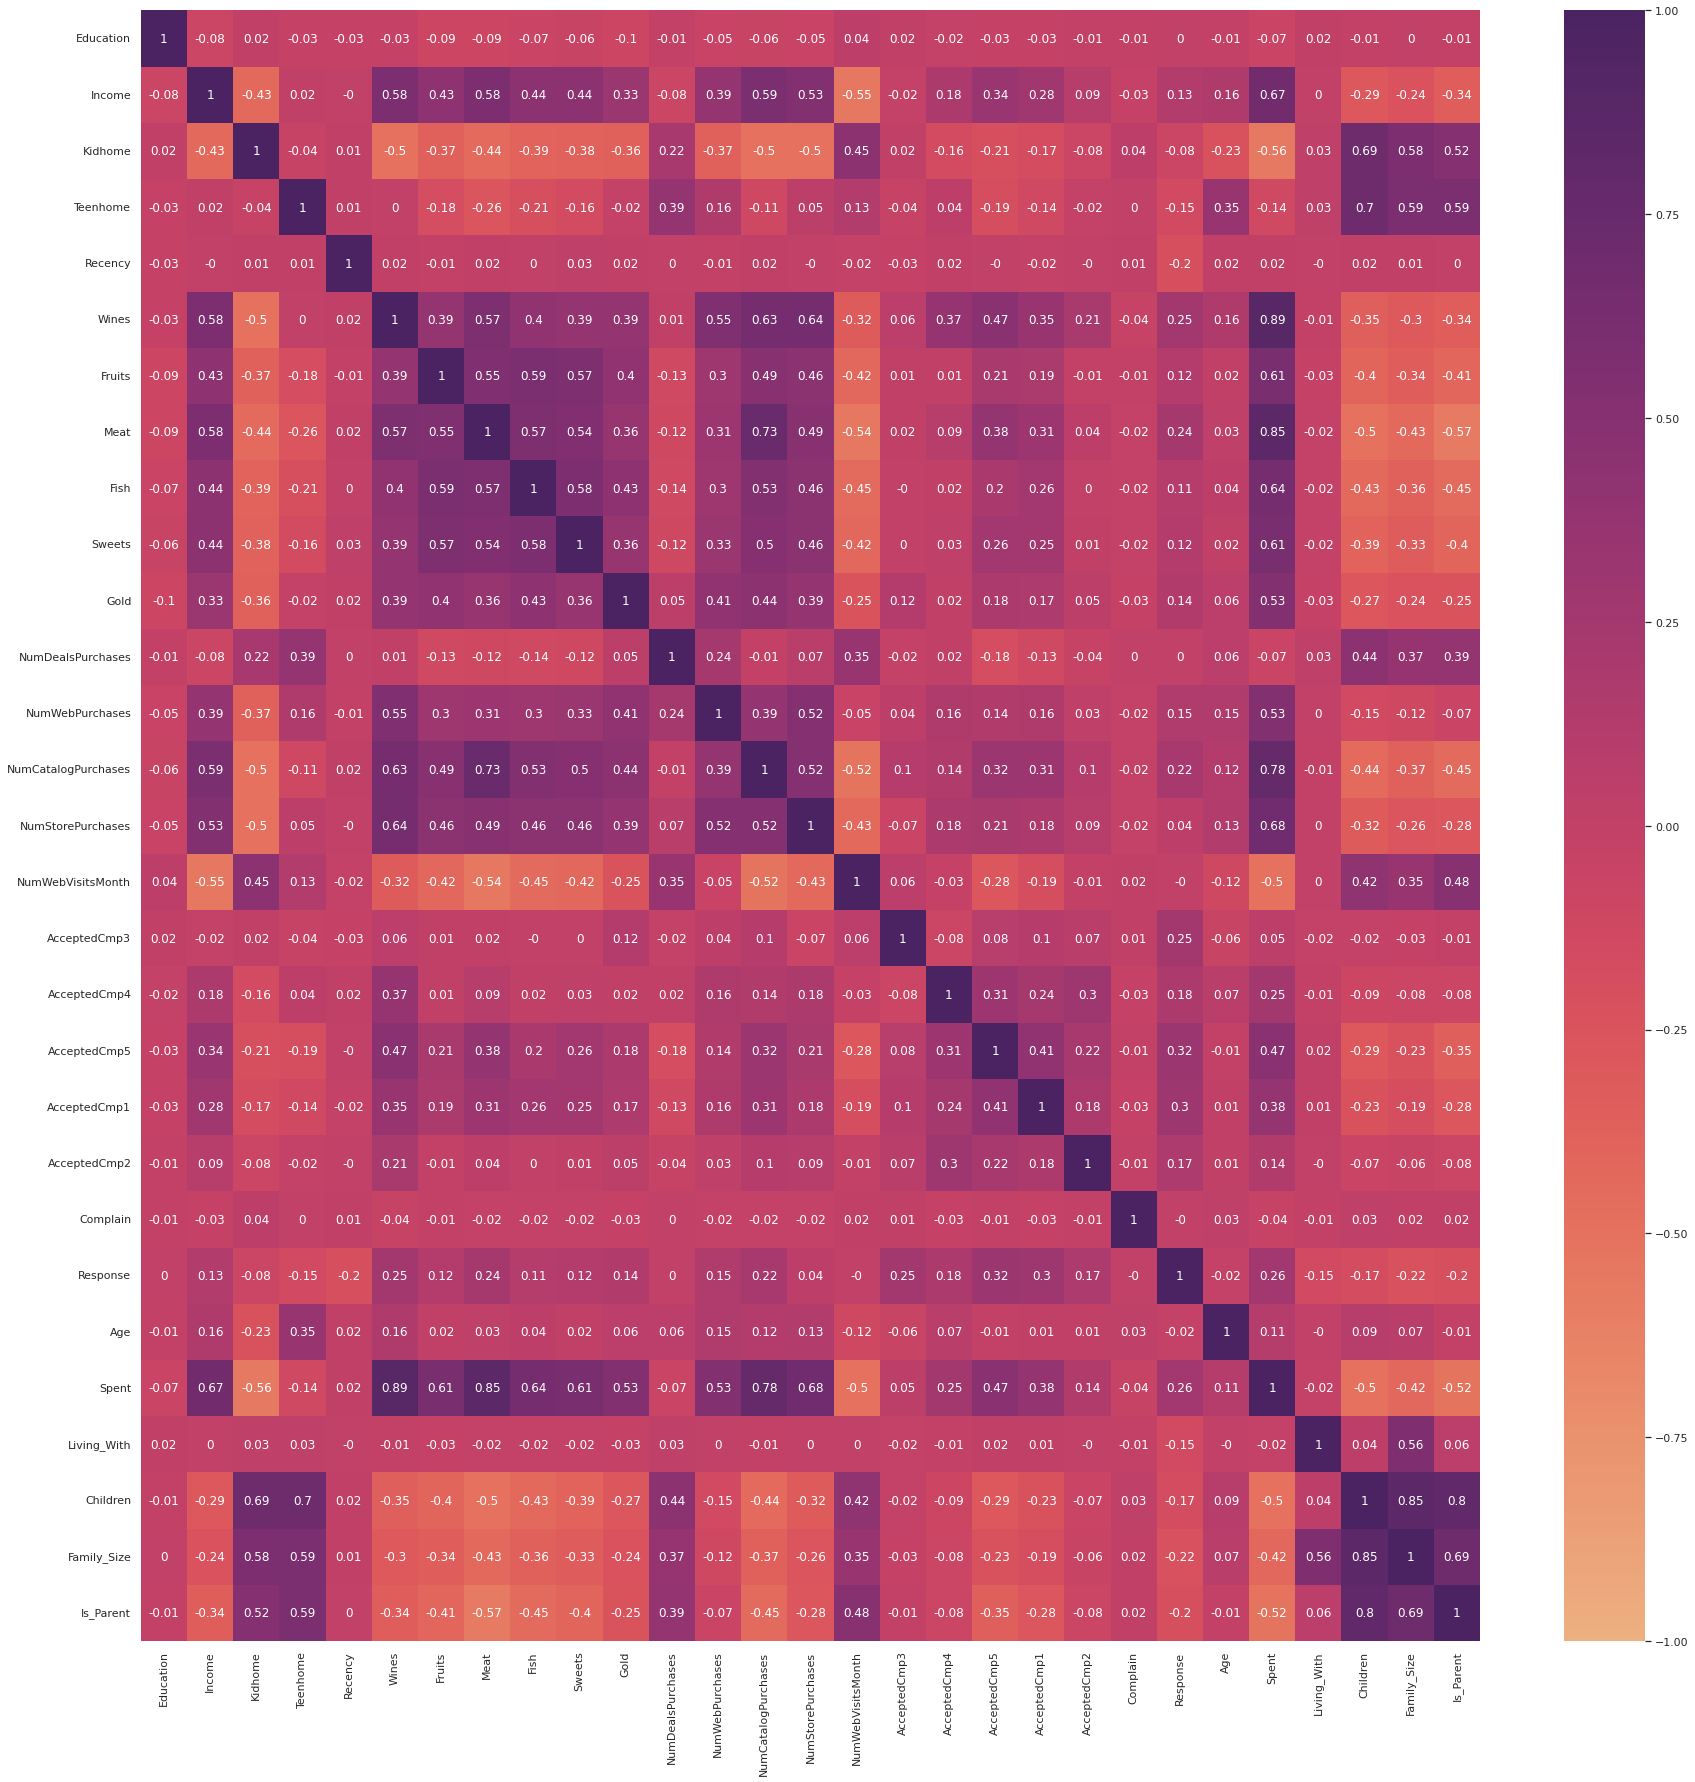

In [ ]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(data.corr(method='pearson').round(2), annot=True, cmap='flare', vmin=-1, vmax=1)

In [ ]:
data.corr()

Education    Income   Kidhome  Teenhome   Recency  \
Education             1.000000 -0.083330  0.021925 -0.031963 -0.025080   
Income               -0.083330  1.000000 -0.428669  0.019133 -0.003970   
Kidhome               0.021925 -0.428669  1.000000 -0.039869  0.011492   
Teenhome             -0.031963  0.019133 -0.039869  1.000000  0.013838   
Recency              -0.025080 -0.003970  0.011492  0.013838  1.000000   
Wines                -0.028515  0.578650 -0.497336  0.003747  0.015721   
Fruits               -0.087148  0.430842 -0.373396 -0.176558 -0.005844   
Meat                 -0.087573  0.584633 -0.439261 -0.261122  0.022518   
Fish                 -0.066117  0.438871 -0.388884 -0.205242  0.000551   
Sweets               -0.064606  0.440744 -0.378026 -0.163056  0.025110   
Gold                 -0.102699  0.325916 -0.355029 -0.019887  0.017663   
NumDealsPurchases    -0.009647 -0.083101  0.216913  0.386246  0.002115   
NumWebPurchases      -0.052171  0.387878 -0.371977  0.162077 -0.005641   
NumCatalogPurchases  -0.057908  0.589162 -0.504501 -0.112692  0.024081   
NumStorePurchases    -0.051316  0.529362 -0.501349  0.049737 -0.000434   
NumWebVisitsMonth     0.040857 -0.553088  0.447477  0.131240 -0.018564   
AcceptedCmp3          0.016204 -0.016174  0.016066 -0.042522 -0.032257   
AcceptedCmp4         -0.015655  0.184400 -0.162026  0.038376  0.017566   
AcceptedCmp5         -0.032940  0.335943 -0.205305 -0.190791 -0.000482   
AcceptedCmp1         -0.029026  0.276820 -0.174163 -0.144855 -0.021061   
AcceptedCmp2         -0.013317  0.087545 -0.081868 -0.015521 -0.001400   
Complain             -0.012482 -0.027225  0.040978  0.003307  0.013637   
Response              0.002834  0.133047 -0.077909 -0.153901 -0.199766   
Age                  -0.010922  0.161791 -0.233615  0.350791  0.016295   
Spent                -0.073517  0.667576 -0.557899 -0.138153  0.020066   
Living_With           0.016916  0.004663  0.026788  0.031651 -0.001371   
Children             -0.007506 -0.293352  0.687794  0.697907  0.018290   
Family_Size           0.002730 -0.240148  0.582982  0.593915  0.014402   
Is_Parent            -0.009108 -0.338153  0.520454  0.587441  0.002485   

                        Wines    Fruits      Meat      Fish    Sweets  ...  \
Education           -0.028515 -0.087148 -0.087573 -0.066117 -0.064606  ...   
Income               0.578650  0.430842  0.584633  0.438871  0.440744  ...   
Kidhome             -0.497336 -0.373396 -0.439261 -0.388884 -0.378026  ...   
Teenhome             0.003747 -0.176558 -0.261122 -0.205242 -0.163056  ...   
Recency              0.015721 -0.005844  0.022518  0.000551  0.025110  ...   
Wines                1.000000  0.387024  0.568860  0.397721  0.390326  ...   
Fruits               0.387024  1.000000  0.547822  0.593431  0.571606  ...   
Meat                 0.568860  0.547822  1.000000  0.573574  0.535136  ...   
Fish                 0.397721  0.593431  0.573574  1.000000  0.583867  ...   
Sweets               0.390326  0.571606  0.535136  0.583867  1.000000  ...   
Gold                 0.392731  0.396487  0.359446  0.427142  0.357450  ...   
NumDealsPurchases    0.008886 -0.134512 -0.121308 -0.143241 -0.121432  ...   
NumWebPurchases      0.553786  0.302039  0.307090  0.299688  0.333937  ...   
NumCatalogPurchases  0.634753  0.486263  0.734127  0.532757  0.495136  ...   
NumStorePurchases    0.640012  0.458491  0.486006  0.457745  0.455225  ...   
NumWebVisitsMonth   -0.321978 -0.418729 -0.539484 -0.446423 -0.422371  ...   
AcceptedCmp3         0.061463  0.014424  0.018438 -0.000219  0.001780  ...   
AcceptedCmp4         0.373143  0.006396  0.091618  0.016105  0.029313  ...   
AcceptedCmp5         0.473550  0.212871  0.376867  0.196277  0.259230  ...   
AcceptedCmp1         0.351417  0.191816  0.313076  0.261608  0.245102  ...   
AcceptedCmp2         0.206185 -0.009980  0.043521  0.002345  0.010188  ...   
Complain            -0.039470 -0.005324 -0.023782 -0.021220 -0.022641  ...   
Respon

# **Standard Scaling**

In [ ]:
ds = data.copy()
# subset of dataframe and dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [ ]:
scaled_ds

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0     -0.894187  0.234063 -0.823039 -0.928972  0.310532  0.978226  1.549429   
1     -0.894187 -0.234559  1.039938  0.909066 -0.380509 -0.872024 -0.637328   
2     -0.894187  0.769478 -0.823039 -0.928972 -0.795134  0.358511  0.569159   
3     -0.894187 -1.017239  1.039938 -0.928972 -0.795134 -0.872024 -0.561922   
4      0.569268  0.240221  1.039938 -0.928972  1.554407 -0.391671  0.418348   
...         ...       ...       ...       ...       ...       ...       ...   
2211  -0.894187  0.356642 -0.823039  0.909066 -0.104093  1.197646  0.418348   
2212   0.569268  0.467539  2.902916  0.909066  0.241428  0.299208 -0.662463   
2213  -0.894187  0.188091 -0.823039 -0.928972  1.450751  1.787710  0.544024   
2214   0.569268  0.675388 -0.823039  0.909066 -1.417072  0.364441  0.091591   
2215   0.569268  0.024705  1.039938  0.909066 -0.311405 -0.655568 -0.587058   

          Meat      Fish    Sweets  ...  NumWebPurchases  NumCatalogPurchases  \
0     1.690227  2.454568  1.484827  ...         1.428553             2.504712   
1    -0.717986 -0.651038 -0.633880  ...        -1.125881            -0.571082   
2    -0.178368  1.340203 -0.146821  ...         1.428553            -0.229327   
3    -0.655551 -0.504892 -0.585174  ...        -0.760962            -0.912837   
4    -0.218505  0.152766 -0.000703  ...         0.333796             0.112428   
...        ...       ...       ...  ...              ...                  ...   
2211  0.066913  0.079693  2.215416  ...         1.793473             0.112428   
2212 -0.610954 -0.687574 -0.658233  ...         1.428553            -0.229327   
2213  0.223001 -0.102990 -0.365998  ...        -0.760962             0.112428   
2214  0.209622  0.773887  0.072356  ...         0.698715             0.795937   
2215 -0.472705 -0.651038 -0.633880  ...        -0.396043            -0.571082   

      NumStorePurchases  NumWebVisitsMonth       Age     Spent  Living_With  \
0             -0.554143           0.693232  0.986443  1.675488    -1.348829   
1             -1.169518          -0.131574  1.236801 -0.962358    -1.348829   
2              1.291982          -0.543978  0.318822  0.280250     0.741384   
3             -0.554143           0.280829 -1.266777 -0.919224     0.741384   
4              0.061232          -0.131574 -1.016420 -0.307044     0.741384   
...                 ...                ...       ...       ...          ...   
2211          -0.554143          -0.131574  0.151917  1.217598     0.741384   
2212          -0.246455           0.693232  1.904422 -0.270546     0.741384   
2213           2.215044           0.280829 -1.016420  1.051696    -1.348829   
2214           1.291982          -0.956381  1.069896  0.391404     0.741384   
2215          -0.554143           0.693232  1.236801 -0.721800     0.741384   

      Children  Family_Size  Is_Parent  
0    -1.264803    -1.758673  -1.581389  
1     1.405806     0.450009   0.632356  
2    -1.264803    -0.654332  -1.581389  
3     0.070501     0.450009   0.632356  
4     0.070501     0.450009   0.632356  
...        ...          ...        ...  
2211  0.070501     0.450009   0.632356  
2212  2.741110     2.658691   0.632356  
2213 -1.264803    -1.758673  -1.581389  
2214  0.070501     0.450009   0.632356  
2215  1.405806     1.554350   0.632356  

[2216 rows x 22 columns]

# **Split Dataframe**

#### **Spliting the dataframe for hierarchical clust and non-hierarchical clust**

In [ ]:
X_hier = scaled_ds.copy()
X_nonhier = scaled_ds.copy()[['Age', 'Income', 'Spent', 'Family_Size']]

In [ ]:
X_hier

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0     -0.894187  0.234063 -0.823039 -0.928972  0.310532  0.978226  1.549429   
1     -0.894187 -0.234559  1.039938  0.909066 -0.380509 -0.872024 -0.637328   
2     -0.894187  0.769478 -0.823039 -0.928972 -0.795134  0.358511  0.569159   
3     -0.894187 -1.017239  1.039938 -0.928972 -0.795134 -0.872024 -0.561922   
4      0.569268  0.240221  1.039938 -0.928972  1.554407 -0.391671  0.418348   
...         ...       ...       ...       ...       ...       ...       ...   
2211  -0.894187  0.356642 -0.823039  0.909066 -0.104093  1.197646  0.418348   
2212   0.569268  0.467539  2.902916  0.909066  0.241428  0.299208 -0.662463   
2213  -0.894187  0.188091 -0.823039 -0.928972  1.450751  1.787710  0.544024   
2214   0.569268  0.675388 -0.823039  0.909066 -1.417072  0.364441  0.091591   
2215   0.569268  0.024705  1.039938  0.909066 -0.311405 -0.655568 -0.587058   

          Meat      Fish    Sweets  ...  NumWebPurchases  NumCatalogPurchases  \
0     1.690227  2.454568  1.484827  ...         1.428553             2.504712   
1    -0.717986 -0.651038 -0.633880  ...        -1.125881            -0.571082   
2    -0.178368  1.340203 -0.146821  ...         1.428553            -0.229327   
3    -0.655551 -0.504892 -0.585174  ...        -0.760962            -0.912837   
4    -0.218505  0.152766 -0.000703  ...         0.333796             0.112428   
...        ...       ...       ...  ...              ...                  ...   
2211  0.066913  0.079693  2.215416  ...         1.793473             0.112428   
2212 -0.610954 -0.687574 -0.658233  ...         1.428553            -0.229327   
2213  0.223001 -0.102990 -0.365998  ...        -0.760962             0.112428   
2214  0.209622  0.773887  0.072356  ...         0.698715             0.795937   
2215 -0.472705 -0.651038 -0.633880  ...        -0.396043            -0.571082   

      NumStorePurchases  NumWebVisitsMonth       Age     Spent  Living_With  \
0             -0.554143           0.693232  0.986443  1.675488    -1.348829   
1             -1.169518          -0.131574  1.236801 -0.962358    -1.348829   
2              1.291982          -0.543978  0.318822  0.280250     0.741384   
3             -0.554143           0.280829 -1.266777 -0.919224     0.741384   
4              0.061232          -0.131574 -1.016420 -0.307044     0.741384   
...                 ...                ...       ...       ...          ...   
2211          -0.554143          -0.131574  0.151917  1.217598     0.741384   
2212          -0.246455           0.693232  1.904422 -0.270546     0.741384   
2213           2.215044           0.280829 -1.016420  1.051696    -1.348829   
2214           1.291982          -0.956381  1.069896  0.391404     0.741384   
2215          -0.554143           0.693232  1.236801 -0.721800     0.741384   

      Children  Family_Size  Is_Parent  
0    -1.264803    -1.758673  -1.581389  
1     1.405806     0.450009   0.632356  
2    -1.264803    -0.654332  -1.581389  
3     0.070501     0.450009   0.632356  
4     0.070501     0.450009   0.632356  
...        ...          ...        ...  
2211  0.070501     0.450009   0.632356  
2212  2.741110     2.658691   0.632356  
2213 -1.264803    -1.758673  -1.581389  
2214  0.070501     0.450009   0.632356  
2215  1.405806     1.554350   0.632356  

[2216 rows x 22 columns]

In [ ]:
X_nonhier

Age    Income     Spent  Family_Size
0     0.986443  0.234063  1.675488    -1.758673
1     1.236801 -0.234559 -0.962358     0.450009
2     0.318822  0.769478  0.280250    -0.654332
3    -1.266777 -1.017239 -0.919224     0.450009
4    -1.016420  0.240221 -0.307044     0.450009
...        ...       ...       ...          ...
2211  0.151917  0.356642  1.217598     0.450009
2212  1.904422  0.467539 -0.270546     2.658691
2213 -1.016420  0.188091  1.051696    -1.758673
2214  1.069896  0.675388  0.391404     0.450009
2215  1.236801  0.024705 -0.721800     1.554350

[2216 rows x 4 columns]

# **Dimensionality Reduction**

#### **PCA for Hierarchical**

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_hier)
PCA_hier = pd.DataFrame(pca.transform(X_hier), columns=(["col1","col2"]))
PCA_hier.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2216.0  2.565136e-17  2.848682 -5.843091 -2.497235 -0.800306  2.398025   
col2  2216.0 -6.412841e-18  1.691218 -4.246267 -1.317276 -0.139422  1.228183   

           max  
col1  7.347915  
col2  6.083139

In [ ]:
PCA_hier

col1      col2
0     4.968148 -0.339963
1    -2.854163  0.141959
2     2.588036 -0.685933
3    -2.550544 -1.325581
4    -0.656340  0.288442
...        ...       ...
2211  2.291521  2.467663
2212 -3.160871  4.178437
2213  2.717565 -1.758611
2214  1.456457  1.826345
2215 -2.823626  1.469868

[2216 rows x 2 columns]

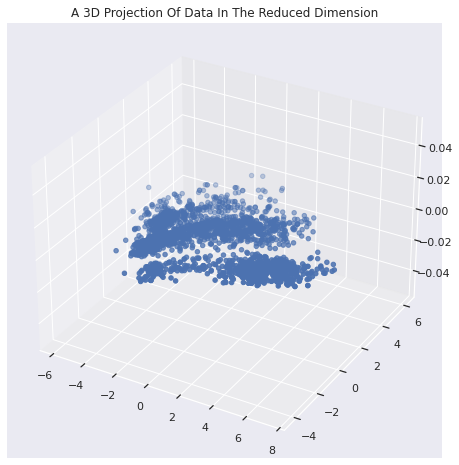

In [ ]:
x =PCA_hier["col1"]
y =PCA_hier["col2"]
#plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y, cmap=cmap, marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

#### **PCA for Non-hierarchical**

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_nonhier)
PCA_nonhier = pd.DataFrame(pca.transform(X_nonhier), columns=(["col1","col2"]))
PCA_nonhier.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2216.0  3.527062e-17  1.390702 -2.468421 -1.149037 -0.328234  1.079947   
col2  2216.0  2.404815e-17  1.033024 -2.819530 -0.705738 -0.013697  0.770665   

            max  
col1  13.839293  
col2   5.208092

In [ ]:
PCA_nonhier

col1      col2
0     2.148050  0.006797
1    -0.777905  1.265153
2     0.980886  0.075149
3    -1.597658 -1.016842
4    -0.404274 -0.615550
...        ...       ...
2211  0.830789  0.379364
2212 -0.774024  3.000692
2213  1.414948 -1.714407
2214  0.624564  1.237295
2215 -0.949789  1.832855

[2216 rows x 2 columns]

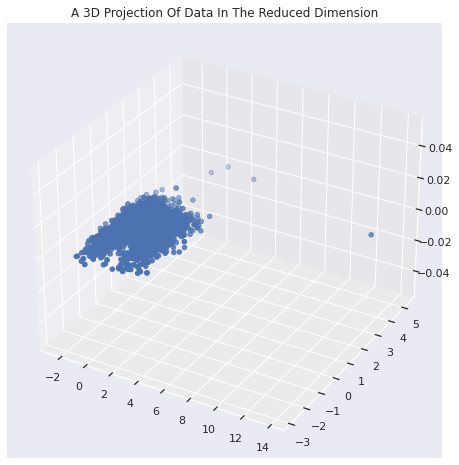

In [ ]:
x =PCA_nonhier["col1"]
y =PCA_nonhier["col2"]
#plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y, cmap=cmap, marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# **Clustering**

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
scaled_ds.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Spent', 'Living_With', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

### **Hierarchical**

#### **Agglomerative Clustering**

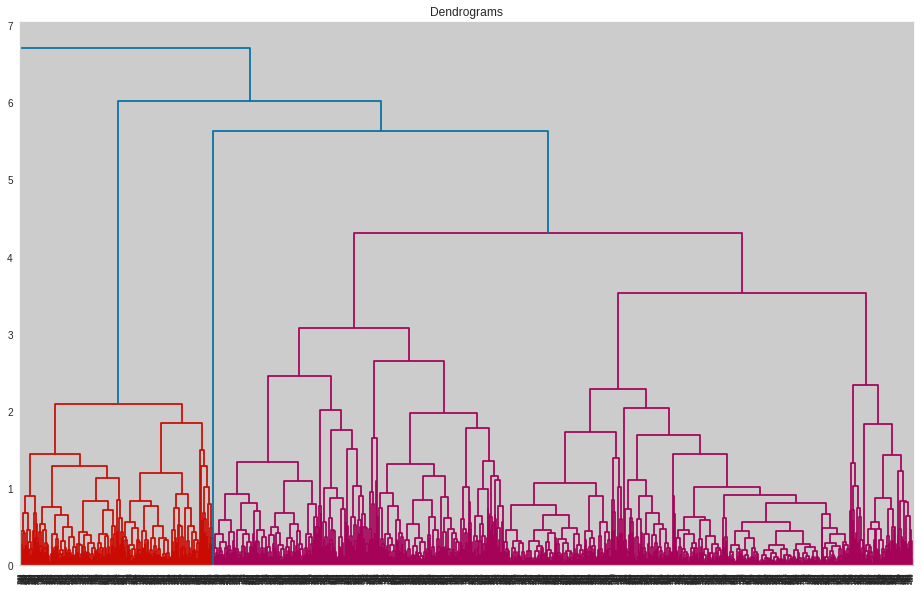

In [ ]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
Z = hierarchy.linkage(PCA_hier, method='average')

fig, axes = plt.subplots(figsize=(16, 10))
plt.title("Dendrograms")

dendrogram = hierarchy.dendrogram(Z)

Elbow Method to determine the number of clusters to be formed:


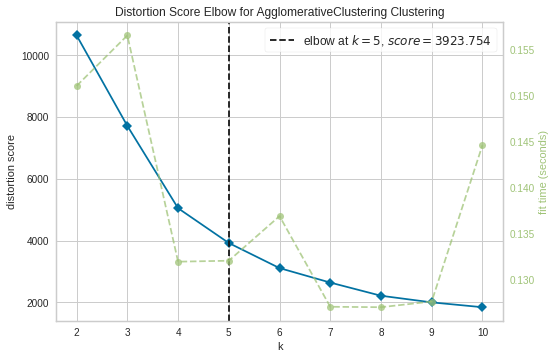

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(PCA_hier)
Elbow_M.show()

Kode tersebut menggunakan library yellowbrick untuk memvisualisasikan metode Elbow dalam clustering data.

KElbowVisualizer() adalah sebuah fungsi yang digunakan untuk memvisualisasikan nilai elbow (siku) dalam suatu plot. Fungsi ini memerlukan 2 parameter yaitu:
AgglomerativeClustering(), objek model clustering yang ingin dipakai (dalam hal ini AgglomerativeClustering)
k, jumlah klaster yang ingin ditest nilai elbow nya.
AgglomerativeClustering() adalah sebuah model clustering dengan algoritma AgglomerativeClustering.
k=10 adalah jumlah klaster yang ingin diuji dalam range nilai 1 hingga 10.
Jadi, kode tersebut secara keseluruhan menginisialisasi sebuah objek KElbowVisualizer dengan memakai model AgglomerativeClustering() dan menguji nilai elbow dengan jumlah klaster dari 1 hingga 10. Objek ini nantinya dapat digunakan untuk memvisualisasikan nilai elbow pada data yang ingin di-cluster.

In [ ]:
#Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
pred_AC = AC.fit_predict(PCA_hier)
PCA_hier["Clusters"] = pred_AC
#Adding the Clusters feature to the orignal dataframe.
data_hier_clust = data.copy()
data_hier_clust["Clusters"]= pred_AC

Agglomerative Clustering adalah teknik clustering hierarkis yang memulai dengan setiap titik data sebagai cluster dan menggabungkan cluster yang paling dekat satu sama lain untuk membentuk cluster yang lebih besar, hingga semua titik data termasuk dalam satu cluster. Agglomerative Clustering dapat digunakan untuk menghasilkan struktur hierarkis dalam data dan memberikan hasil yang mudah diinterpretasikan.

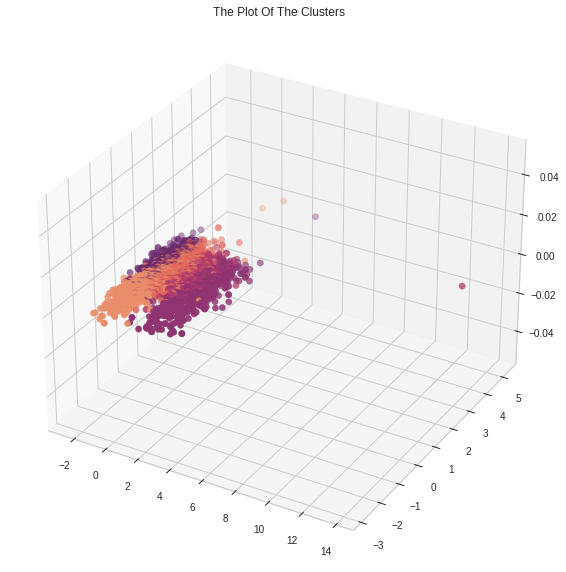

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, s=40, c=data_hier_clust["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
data_hier_clust

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  AcceptedCmp2  Complain  Response  Age  Spent  \
0      172      88  ...             0         0         1   66   1617   
1        2       1  ...             0         0         0   69     27   
2      111      21  ...             0         0         0   58    776   
3       10       3  ...             0         0         0   39     53   
4       46      27  ...             0         0         0   42    422   
...    ...     ...  ...           ...       ...       ...  ...    ...   
2235    42     118  ...             0         0         0   56   1341   
2236     0       0  ...             0         0         0   77    444   
2237    32      12  ...             0         0         0   42   1241   
2238    80      30  ...             0         0         0   67    843   
2239     2       1  ...             0         0         1   69    172   

      Living_With  Children  Family_Size  Is_Parent  Clusters  
0               0         0            1          0         3  
1               0         2            3          1         4  
2               1         0            2          0         3  
3               1         1            3          1         0  
4               1         1            3          1         1  
...           ...       ...          ...        ...       ...  
2235            1         1            3          1         2  
2236            1         3            5          1         1  
2237            0         0            1          0         3  
2238            1         1            3          1         2  
2239            1         2            4          1         4  

[2216 rows x 30 columns]

In [ ]:
data_hier_clust.groupby('Clusters').count()

Education  Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
Clusters                                                                       
0               704     704      704       704      704    704     704   704   
1               413     413      413       413      413    413     413   413   
2               334     334      334       334      334    334     334   334   
3               477     477      477       477      477    477     477   477   
4               288     288      288       288      288    288     288   288   

          Fish  Sweets  ...  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
Clusters                ...                                                   
0          704     704  ...           704           704       704       704   
1          413     413  ...           413           413       413       413   
2          334     334  ...           334           334       334       334   
3          477     477  ...           477           477       477       477   
4          288     288  ...           288           288       288       288   

          Age  Spent  Living_With  Children  Family_Size  Is_Parent  
Clusters                                                             
0         704    704          704       704          704        704  
1         413    413          413       413          413        413  
2         334    334          334       334          334        334  
3         477    477          477       477          477        477  
4         288    288          288       288          288        288  

[5 rows x 29 columns]

### **Segmentasi Menurut Cluster Hierarchical**

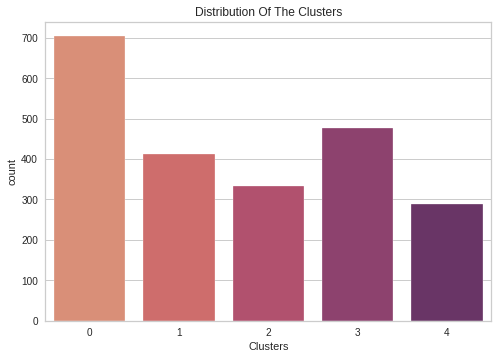

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=data_hier_clust["Clusters"], palette= 'flare')
pl.set_title("Distribution Of The Clusters")
plt.show()

Berdasarkan barchart di atas, dapat dilihat bahwa data dibagi menjadi 5 cluster. Cluster terbanyak adalah cluster 0, cluster 3, cluster 1, cluster 2 dan cluster 4.

In [ ]:
data_hier_clust.groupby('Clusters').count()

Education  Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
Clusters                                                                       
0               704     704      704       704      704    704     704   704   
1               413     413      413       413      413    413     413   413   
2               334     334      334       334      334    334     334   334   
3               477     477      477       477      477    477     477   477   
4               288     288      288       288      288    288     288   288   

          Fish  Sweets  ...  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
Clusters                ...                                                   
0          704     704  ...           704           704       704       704   
1          413     413  ...           413           413       413       413   
2          334     334  ...           334           334       334       334   
3          477     477  ...           477           477       477       477   
4          288     288  ...           288           288       288       288   

          Age  Spent  Living_With  Children  Family_Size  Is_Parent  
Clusters                                                             
0         704    704          704       704          704        704  
1         413    413          413       413          413        413  
2         334    334          334       334          334        334  
3         477    477          477       477          477        477  
4         288    288          288       288          288        288  

[5 rows x 29 columns]

In [ ]:
data.describe()

Education         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean      0.611011   52247.251354     0.441787     0.505415    49.012635   
std       0.683469   25173.076661     0.536896     0.544181    28.948352   
min       0.000000    1730.000000     0.000000     0.000000     0.000000   
25%       0.000000   35303.000000     0.000000     0.000000    24.000000   
50%       0.000000   51381.500000     0.000000     0.000000    49.000000   
75%       1.000000   68522.000000     1.000000     1.000000    74.000000   
max       2.000000  666666.000000     2.000000     2.000000    99.000000   

             Wines       Fruits         Meat         Fish       Sweets  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean    305.091606    26.356047   166.995939    37.637635    27.028881  ...   
std     337.327920    39.793917   224.283273    54.752082    41.072046  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%      24.000000     2.000000    16.000000     3.000000     1.000000  ...   
50%     174.500000     8.000000    68.000000    12.000000     8.000000  ...   
75%     505.000000    33.000000   232.250000    50.000000    33.000000  ...   
max    1493.000000   199.000000  1725.000000   259.000000   262.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response          Age  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2216.000000   
mean       0.064079      0.013538     0.009477     0.150271    54.179603   
std        0.244950      0.115588     0.096907     0.357417    11.985554   
min        0.000000      0.000000     0.000000     0.000000    27.000000   
25%        0.000000      0.000000     0.000000     0.000000    46.000000   
50%        0.000000      0.000000     0.000000     0.000000    53.000000   
75%        0.000000      0.000000     0.000000     0.000000    64.000000   
max        1.000000      1.000000     1.000000     1.000000   130.000000   

             Spent  Living_With     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean    607.075361     0.645307     0.947202     2.592509     0.714350  
std     602.900476     0.478528     0.749062     0.905722     0.451825  
min       5.000000     0.000000     0.000000     1.000000     0.000000  
25%      69.000000     0.000000     0.000000     2.000000     0.000000  
50%     396.500000     1.000000     1.000000     3.000000     1.000000  
75%    1048.000000     1.000000     1.000000     3.000000     1.000000  
max    2525.000000     1.000000     3.000000     5.000000     1.000000  

[8 rows x 29 columns]

In [ ]:
data_hier_clust[['Age','Clusters']].groupby('Clusters').describe()

Age                                                      
          count       mean        std   min    25%   50%   75%    max
Clusters                                                             
0         704.0  48.502841  11.459248  27.0  40.00  47.0  53.0  130.0
1         413.0  57.723971   9.839801  33.0  49.00  58.0  67.0   77.0
2         334.0  57.691617   9.393825  34.0  50.25  57.0  65.0   78.0
3         477.0  54.974843  14.438925  28.0  42.00  54.0  67.0  124.0
4         288.0  57.583333   8.701796  41.0  51.00  57.0  65.0   75.0

Dataframe di atas menunjukkan statistika deskriptif berdasarkan cluster, sehingga didapatkan bahwa


- Cluster 0 memiliki rata-rata usia 48,50
- Cluster 1 memiliki rata-rata usia 57,72
- Cluster 2 memiliki rata-rata usia 57,69
- Cluster 3 memiliki rata-rata usia 54,97
- Cluster 4 memiliki rata-rata usia 57,58



In [ ]:
data_hier_clust[['Spent', 'Clusters']].groupby('Clusters').describe()

Spent                                                            \
          count         mean         std    min      25%     50%      75%   
Clusters                                                                    
0         704.0   113.954545  127.777515    5.0    38.75    67.0   137.00   
1         413.0   501.152542  238.960204  126.0   320.00   458.0   606.00   
2         334.0  1108.598802  337.933600   62.0   868.75  1048.5  1300.25   
3         477.0  1402.150943  424.397826  277.0  1092.00  1367.0  1685.00   
4         288.0    65.906250   47.590972    8.0    36.00    53.0    84.00   

                  
             max  
Clusters          
0         1250.0  
1         1616.0  
2         2194.0  
3         2525.0  
4          264.0

Dataframe di atas menunjukkan statistika deskriptif berdasarkan cluster, sehingga didapatkan bahwa

- Cluster 0 memiliki rata-rata pengeluaran 113.95
- Cluster 1 memiliki rata-rata pengeluaran 501.15
- Cluster 2 memiliki rata-rata pengeluaran 1108.59
- Cluster 3 memiliki rata-rata pengeluaran 1402.15
- Cluster 4 memiliki rata-rata pengeluaran 65.90

In [ ]:
data_hier_clust[['Income', 'Clusters']].groupby('Clusters').describe()

Income                                                          \
          count          mean           std      min       25%      50%   
Clusters                                                                  
0         704.0  33003.504261  15475.538604   1730.0  23516.25  31610.0   
1         413.0  54635.053269  10000.728543  30522.0  47352.00  54456.0   
2         334.0  68317.634731  34863.428618   2447.0  60852.75  66323.5   
3         477.0  76318.272537  12126.198213  32632.0  69930.00  76800.0   
4         288.0  37358.538194  10182.605800   4023.0  31384.50  37695.5   

                              
               75%       max  
Clusters                      
0         39898.00  162397.0  
1         60597.00   93404.0  
2         72635.25  666666.0  
3         82576.00  160803.0  
4         44400.00   61917.0

Berdasarkan data di atas, terdapat beberapa insight yang dapat diambil yaitu

- Cluster 0 memiliki rata-rata penghasilan 33003.50
- Cluster 1 memiliki rata-rata penghasilan 54635.05
- Cluster 2 memiliki rata-rata penghasilan 68317.63
- Cluster 3 memiliki rata-rata penghasilan 76318.27
- Cluster 4 memiliki rata-rata penghasilan 37358.53


In [ ]:
data_hier_clust[['Family_Size', 'Clusters']].groupby('Clusters').describe()

Family_Size                                             
               count      mean       std  min  25%  50%  75%  max
Clusters                                                         
0              704.0  2.426136  0.646865  1.0  2.0  3.0  3.0  4.0
1              413.0  3.108959  0.737512  2.0  3.0  3.0  4.0  5.0
2              334.0  2.733533  0.506073  2.0  2.0  3.0  3.0  4.0
3              477.0  1.591195  0.492129  1.0  1.0  2.0  2.0  2.0
4              288.0  3.753472  0.576837  3.0  3.0  4.0  4.0  5.0

Berdasarkan informasi dataframe di atas dapat disimpulkan bahwa

- Cluster 0 rata-rata memiliki jumlah orang dalam keluarga sebanyak 3 (pembulatan ke atas)
- Cluster 1 rata-rata memiliki jumlah orang dalam keluarga sebanyak 4(pembulatan ke atas)
- Cluster 2 rata-rata memiliki jumlah orang dalam keluarga sebanyak 3 (pembulatan ke atas)
- Cluster 3 rata-rata memiliki jumlah orang dalam keluarga sebanyak 2 (pembulatan ke atas)
- Cluster 4 rata-rata memiliki jumlah orang dalam keluarga sebanyak 4 (pembulatan ke atas)

### **Non-Hierarchical**

In [ ]:
from sklearn.cluster import KMeans

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

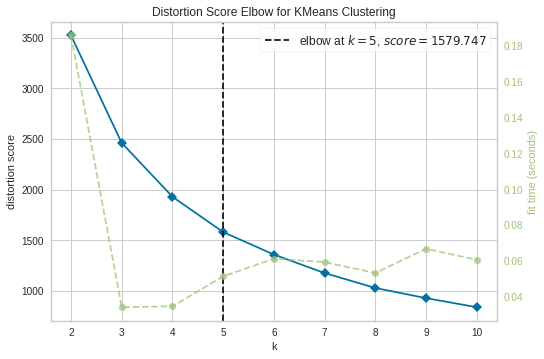

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_nonhier)
Elbow_M.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

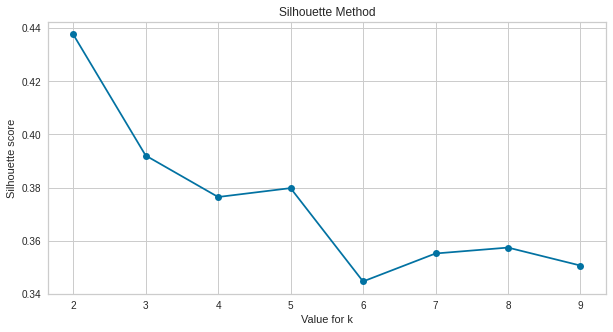

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

k = range(2,10)
score=[]
for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(PCA_nonhier)
    score.append(silhouette_score(PCA_nonhier,kmeans.labels_))
plt.figure(figsize=(10,5))
plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.title('Silhouette Method')
plt.show()

In [ ]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=100).fit(PCA_nonhier).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(PCA_nonhier,labels,metric="euclidean",sample_size=1000,random_state=200)))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 2 is 0.4327708727243942
Silhouette score for k(clusters) = 3 is 0.3977935278981549


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 4 is 0.38189921207197786
Silhouette score for k(clusters) = 5 is 0.386465568758197


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 6 is 0.3498547782675361
Silhouette score for k(clusters) = 7 is 0.34907865583762315


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k(clusters) = 8 is 0.3525206702637651
Silhouette score for k(clusters) = 9 is 0.34045448882476537


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#KMeans Clustering model
KMeans = KMeans(n_clusters=5, random_state=0, n_init = 10).fit(PCA_nonhier)
# fit model and predict clusters
pred_KMeans = KMeans.fit_predict(PCA_nonhier)
PCA_nonhier["Clusters"] = pred_KMeans
#Adding the Clusters feature to the orignal dataframe.
data_nonhier_clust = data.copy()
data_nonhier_clust['Clusters'] = pred_KMeans

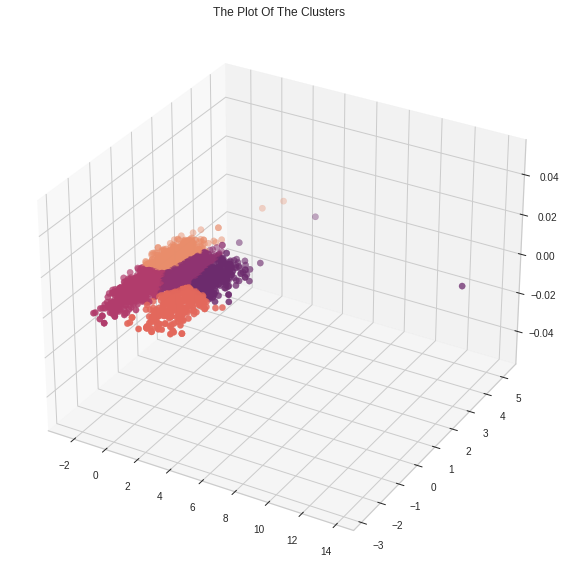

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, s=40, c=data_nonhier_clust["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
data_nonhier_clust

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  AcceptedCmp2  Complain  Response  Age  Spent  \
0      172      88  ...             0         0         1   66   1617   
1        2       1  ...             0         0         0   69     27   
2      111      21  ...             0         0         0   58    776   
3       10       3  ...             0         0         0   39     53   
4       46      27  ...             0         0         0   42    422   
...    ...     ...  ...           ...       ...       ...  ...    ...   
2235    42     118  ...             0         0         0   56   1341   
2236     0       0  ...             0         0         0   77    444   
2237    32      12  ...             0         0         0   42   1241   
2238    80      30  ...             0         0         0   67    843   
2239     2       1  ...             0         0         1   69    172   

      Living_With  Children  Family_Size  Is_Parent  Clusters  
0               0         0            1          0         4  
1               0         2            3          1         0  
2               1         0            2          0         3  
3               1         1            3          1         2  
4               1         1            3          1         2  
...           ...       ...          ...        ...       ...  
2235            1         1            3          1         3  
2236            1         3            5          1         0  
2237            0         0            1          0         1  
2238            1         1            3          1         3  
2239            1         2            4          1         0  

[2216 rows x 30 columns]

### **Segmentasi Menurut Cluster Non Hierarchical**

In [ ]:
data_nonhier_clust.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  ...  AcceptedCmp2  Complain  Response  Age  Spent  Living_With  \
0      88  ...             0         0         1   66   1617            0   
1       1  ...             0         0         0   69     27            0   
2      21  ...             0         0         0   58    776            1   
3       3  ...             0         0         0   39     53            1   
4      27  ...             0         0         0   42    422            1   

   Children  Family_Size  Is_Parent  Clusters  
0         0            1          0         4  
1         2            3          1         0  
2         0            2          0         3  
3         1            3          1         2  
4         1            3          1         2  

[5 rows x 30 columns]

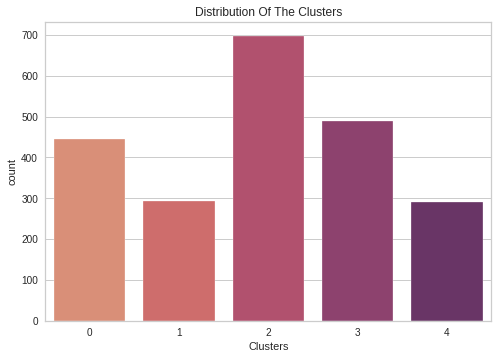

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=data_nonhier_clust["Clusters"], palette= 'flare')
pl.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
data_nonhier_clust.groupby('Clusters').count()

Education  Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
Clusters                                                                       
0               446     446      446       446      446    446     446   446   
1               294     294      294       294      294    294     294   294   
2               697     697      697       697      697    697     697   697   
3               489     489      489       489      489    489     489   489   
4               290     290      290       290      290    290     290   290   

          Fish  Sweets  ...  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
Clusters                ...                                                   
0          446     446  ...           446           446       446       446   
1          294     294  ...           294           294       294       294   
2          697     697  ...           697           697       697       697   
3          489     489  ...           489           489       489       489   
4          290     290  ...           290           290       290       290   

          Age  Spent  Living_With  Children  Family_Size  Is_Parent  
Clusters                                                             
0         446    446          446       446          446        446  
1         294    294          294       294          294        294  
2         697    697          697       697          697        697  
3         489    489          489       489          489        489  
4         290    290          290       290          290        290  

[5 rows x 29 columns]

In [ ]:
data.describe()

Education         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean      0.611011   52247.251354     0.441787     0.505415    49.012635   
std       0.683469   25173.076661     0.536896     0.544181    28.948352   
min       0.000000    1730.000000     0.000000     0.000000     0.000000   
25%       0.000000   35303.000000     0.000000     0.000000    24.000000   
50%       0.000000   51381.500000     0.000000     0.000000    49.000000   
75%       1.000000   68522.000000     1.000000     1.000000    74.000000   
max       2.000000  666666.000000     2.000000     2.000000    99.000000   

             Wines       Fruits         Meat         Fish       Sweets  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean    305.091606    26.356047   166.995939    37.637635    27.028881  ...   
std     337.327920    39.793917   224.283273    54.752082    41.072046  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%      24.000000     2.000000    16.000000     3.000000     1.000000  ...   
50%     174.500000     8.000000    68.000000    12.000000     8.000000  ...   
75%     505.000000    33.000000   232.250000    50.000000    33.000000  ...   
max    1493.000000   199.000000  1725.000000   259.000000   262.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response          Age  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2216.000000   
mean       0.064079      0.013538     0.009477     0.150271    54.179603   
std        0.244950      0.115588     0.096907     0.357417    11.985554   
min        0.000000      0.000000     0.000000     0.000000    27.000000   
25%        0.000000      0.000000     0.000000     0.000000    46.000000   
50%        0.000000      0.000000     0.000000     0.000000    53.000000   
75%        0.000000      0.000000     0.000000     0.000000    64.000000   
max        1.000000      1.000000     1.000000     1.000000   130.000000   

             Spent  Living_With     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean    607.075361     0.645307     0.947202     2.592509     0.714350  
std     602.900476     0.478528     0.749062     0.905722     0.451825  
min       5.000000     0.000000     0.000000     1.000000     0.000000  
25%      69.000000     0.000000     0.000000     2.000000     0.000000  
50%     396.500000     1.000000     1.000000     3.000000     1.000000  
75%    1048.000000     1.000000     1.000000     3.000000     1.000000  
max    2525.000000     1.000000     3.000000     5.000000     1.000000  

[8 rows x 29 columns]

In [ ]:
data_nonhier_clust[['Age','Clusters']].groupby('Clusters').describe()

Age                                                    
          count       mean       std   min   25%   50%   75%    max
Clusters                                                           
0         446.0  61.735426  9.022417  45.0  55.0  61.0  68.0  130.0
1         294.0  43.700680  7.608523  28.0  37.0  44.0  50.0   59.0
2         697.0  44.783357  6.540797  27.0  40.0  45.0  50.0   64.0
3         489.0  59.787321  8.698488  42.0  53.0  59.0  67.0   83.0
4         290.0  66.310345  8.518262  46.0  61.0  66.0  72.0  124.0

Dataframe di atas menunjukkan statistika deskriptif berdasarkan cluster, sehingga didapatkan bahwa

- Cluster 0 memiliki rata-rata usia 61.73
- Cluster 1 memiliki rata-rata usia 43.70
- Cluster 2 memiliki rata-rata usia 44.78
- Cluster 3 memiliki rata-rata usia 59.78
- Cluster 4 memiliki rata-rata usia 66.31

In [ ]:
data_nonhier_clust[['Income','Clusters']].groupby('Clusters').describe()

Income                                                          \
          count          mean           std      min       25%      50%   
Clusters                                                                  
0         446.0  41478.235426  11823.675543   4023.0  34490.25  42101.0   
1         294.0  75215.891156  12766.641881  42000.0  68634.00  74252.0   
2         697.0  32509.308465  12088.226191   1730.0  23724.00  31928.0   
3         489.0  59979.259714  10956.039837  15033.0  54111.00  60934.0   
4         290.0  79925.165517  37370.422161  48192.0  70924.00  77621.0   

                              
               75%       max  
Clusters                      
0         49680.25   75283.0  
1         81731.25  160803.0  
2         40662.00   70829.0  
3         66565.00   94871.0  
4         82416.25  666666.0

Berdasarkan data di atas, terdapat beberapa insight yang dapat diambil yaitu

- Cluster 0 memiliki rata-rata penghasilan 41478.23
- Cluster 1 memiliki rata-rata penghasilan 75215.89
- Cluster 2 memiliki rata-rata penghasilan 32509.30
- Cluster 3 memiliki rata-rata penghasilan 59979.25
- Cluster 4 memiliki rata-rata penghasilan 79925.16

In [ ]:
data_nonhier_clust[['Spent','Clusters']].groupby('Clusters').describe()

Spent                                                           \
          count         mean         std   min      25%     50%      75%   
Clusters                                                                   
0         446.0   165.645740  175.409787   8.0    44.00    89.5   253.75   
1         294.0  1378.829932  419.993936   6.0  1070.25  1355.0  1650.75   
2         697.0   136.505022  164.490795   5.0    41.00    68.0   162.00   
3         489.0   728.296524  325.354624  18.0   492.00   731.0   971.00   
4         290.0  1430.151724  412.850549   8.0  1156.00  1426.0  1690.00   

                  
             max  
Clusters          
0         1314.0  
1         2525.0  
2         1730.0  
3         1562.0  
4         2486.0

Dataframe di atas menunjukkan statistika deskriptif berdasarkan cluster, sehingga didapatkan bahwa

- Cluster 0 memiliki rata-rata pengeluaran 165.64
- Cluster 1 memiliki rata-rata pengeluaran 1378.82
- Cluster 2 memiliki rata-rata pengeluaran 136.50
- Cluster 3 memiliki rata-rata pengeluaran 728.29
- Cluster 4 memiliki rata-rata pengeluaran 1430.15

In [ ]:
data_nonhier_clust[['Family_Size','Clusters']].groupby('Clusters').describe()

Family_Size                                             
               count      mean       std  min  25%  50%  75%  max
Clusters                                                         
0              446.0  3.614350  0.683133  2.0  3.0  4.0  4.0  5.0
1              294.0  1.632653  0.536474  1.0  1.0  2.0  2.0  3.0
2              697.0  2.592539  0.650244  1.0  2.0  3.0  3.0  4.0
3              489.0  2.646217  0.671119  1.0  2.0  3.0  3.0  5.0
4              290.0  1.903448  0.684218  1.0  1.0  2.0  2.0  5.0

Berdasarkan informasi dataframe di atas dapat disimpulkan bahwa

- Cluster 0 rata-rata memiliki jumlah orang dalam keluarga sebanyak 4 (pembulatan ke atas)
- Cluster 1 rata-rata memiliki jumlah orang dalam keluarga sebanyak 2(pembulatan ke atas)
- Cluster 2 rata-rata memiliki jumlah orang dalam keluarga sebanyak 3 (pembulatan ke atas)
- Cluster 3 rata-rata memiliki jumlah orang dalam keluarga sebanyak 3 (pembulatan ke atas)
- Cluster 4 rata-rata memiliki jumlah orang dalam keluarga sebanyak 2 (pembulatan ke atas)

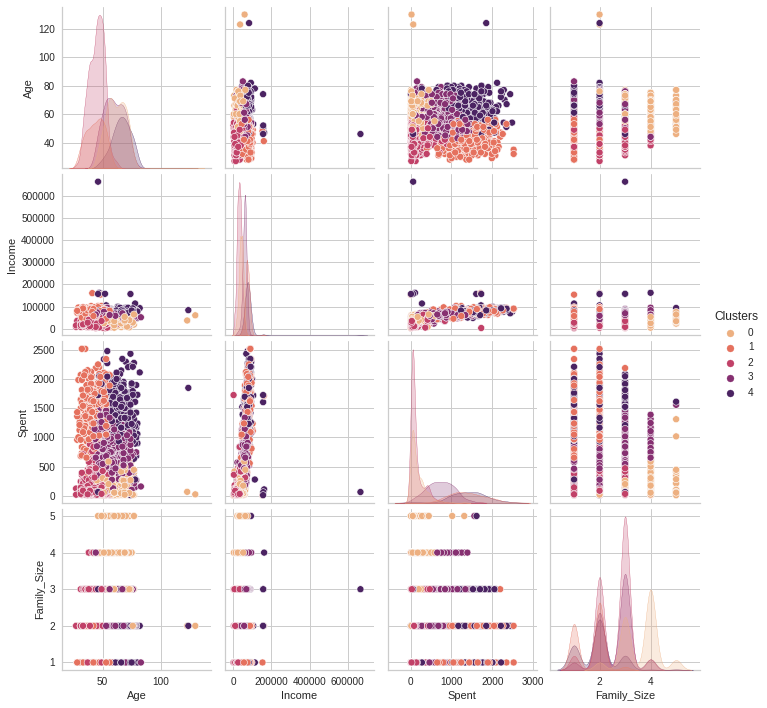

In [ ]:
sns.pairplot(data_nonhier_clust[['Age', 'Income', 'Spent', 'Family_Size', 'Clusters']], hue='Clusters', palette='flare')
plt.show()

# **Compare Hierarchical Clustering VS Non-Hierarchical Clustering**

#### **Each Variable**

Text(0.5, 1.0, "Non-Hierarchical Cluster's Profile Based On Income And Age")

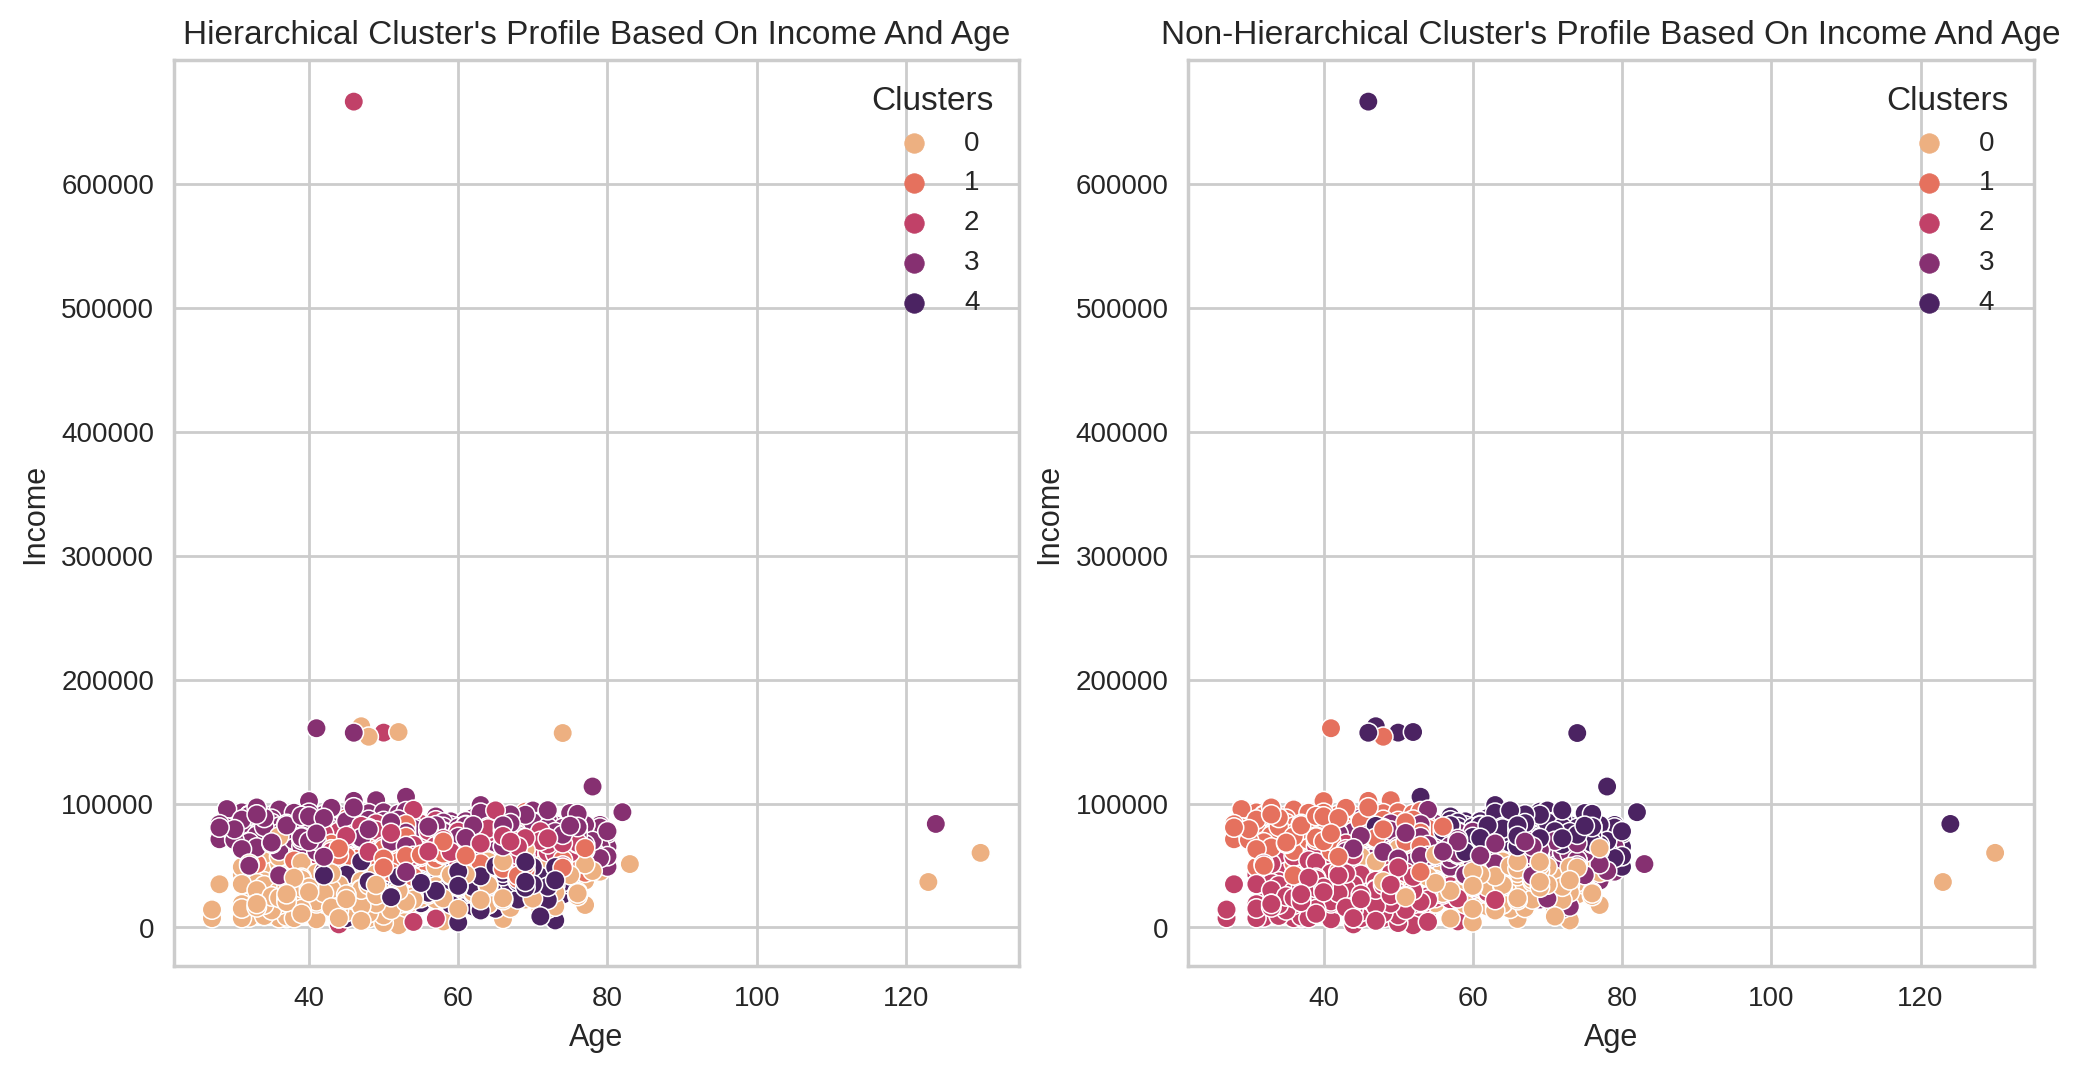

In [ ]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Age',y='Income',data=data_hier_clust,hue='Clusters', palette='flare').set_title("Hierarchical Cluster's Profile Based On Income And Age")

plt.subplot(1,2,2)
sns.scatterplot(x='Age',y='Income',data=data_nonhier_clust,hue='Clusters', palette='flare').set_title("Non-Hierarchical Cluster's Profile Based On Income And Age")

Text(0.5, 1.0, "Non-Hierarchical Cluster's Profile Based On Income And Age")

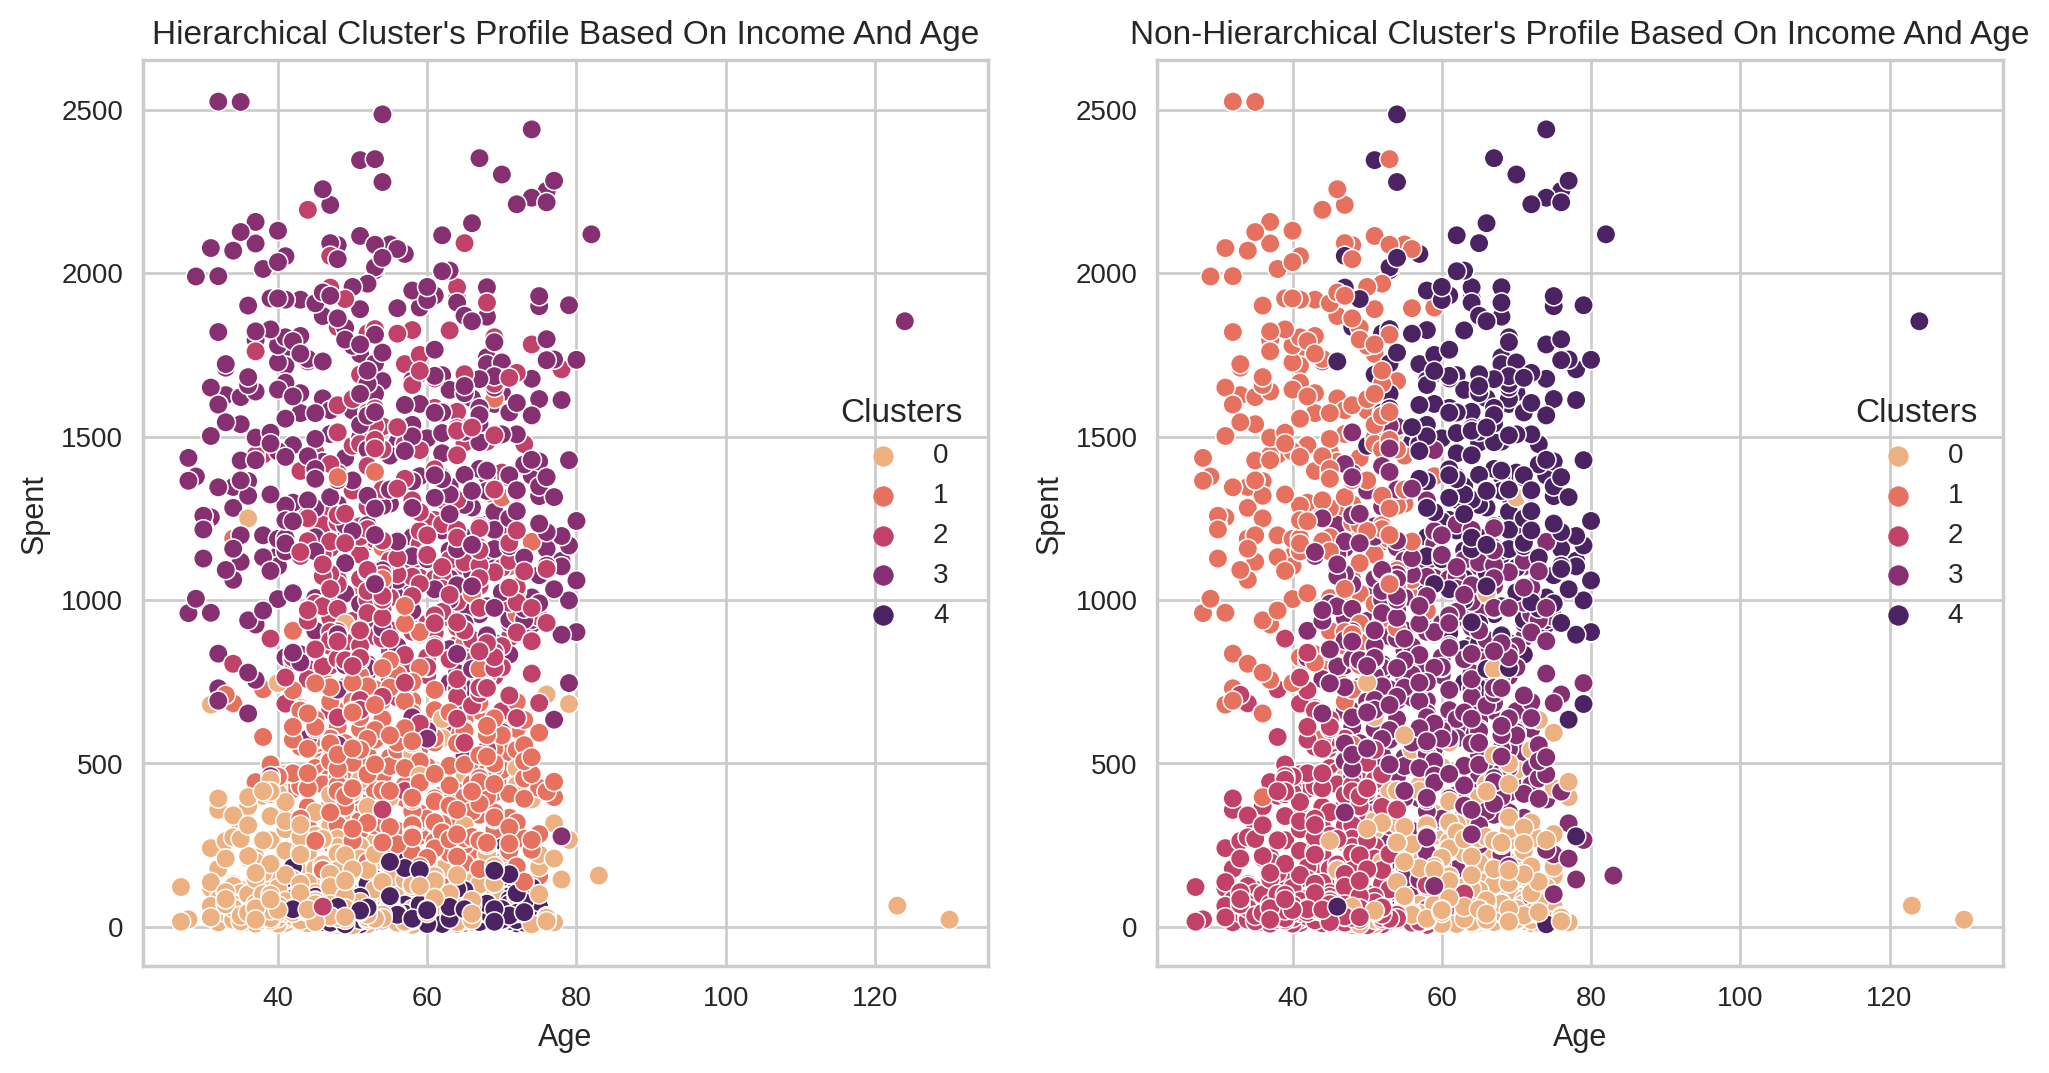

In [ ]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Age',y='Spent',data=data_hier_clust,hue='Clusters', palette='flare').set_title("Hierarchical Cluster's Profile Based On Income And Age")

plt.subplot(1,2,2)
sns.scatterplot(x='Age',y='Spent',data=data_nonhier_clust,hue='Clusters', palette='flare').set_title("Non-Hierarchical Cluster's Profile Based On Income And Age")

Text(0.5, 1.0, "Non-Hierarchical Cluster's Profile Based On Income And Age")

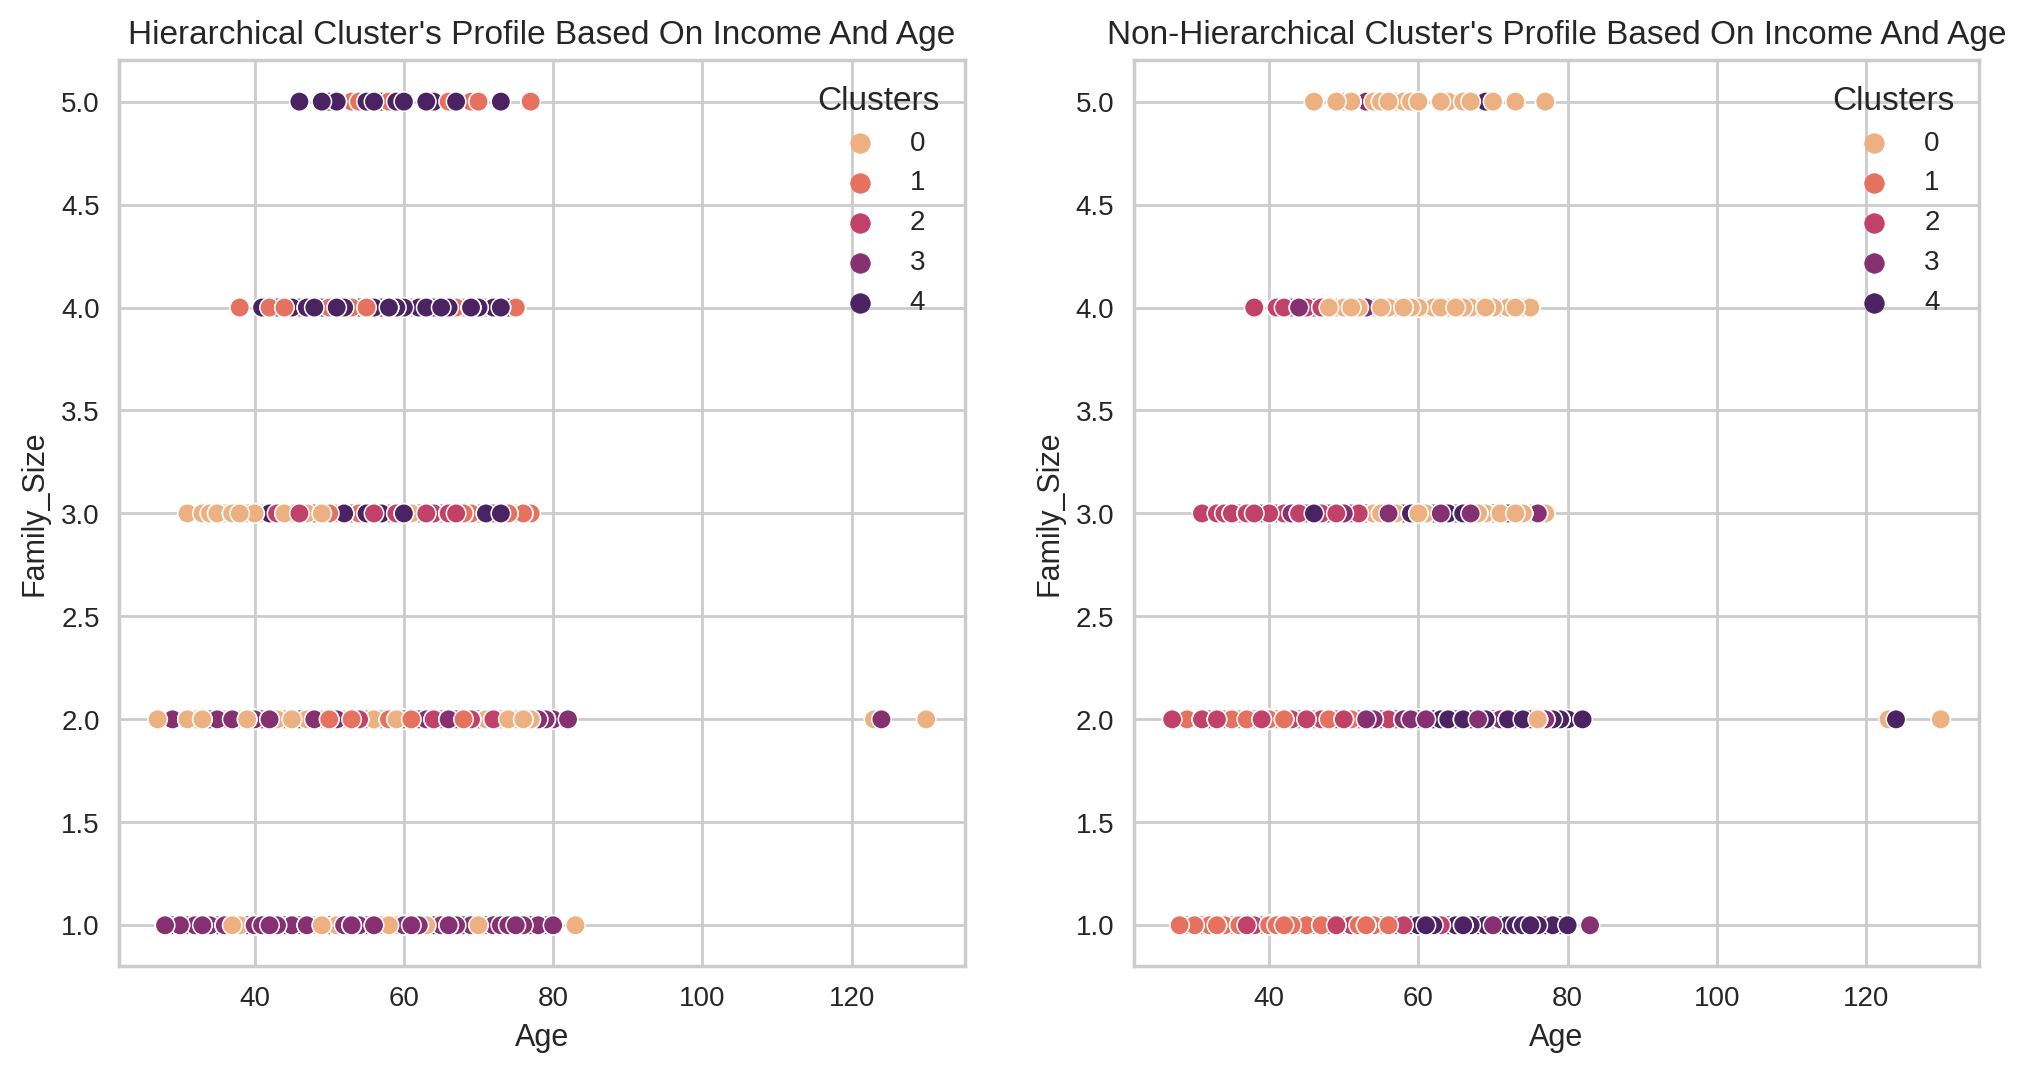

In [ ]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Age',y='Family_Size',data=data_hier_clust,hue='Clusters', palette='flare').set_title("Hierarchical Cluster's Profile Based On Income And Age")

plt.subplot(1,2,2)
sns.scatterplot(x='Age',y='Family_Size',data=data_nonhier_clust,hue='Clusters', palette='flare').set_title("Non-Hierarchical Cluster's Profile Based On Income And Age")

Text(0.5, 1.0, "Non-Hierarchical Cluster's Profile Based On Income And Age")

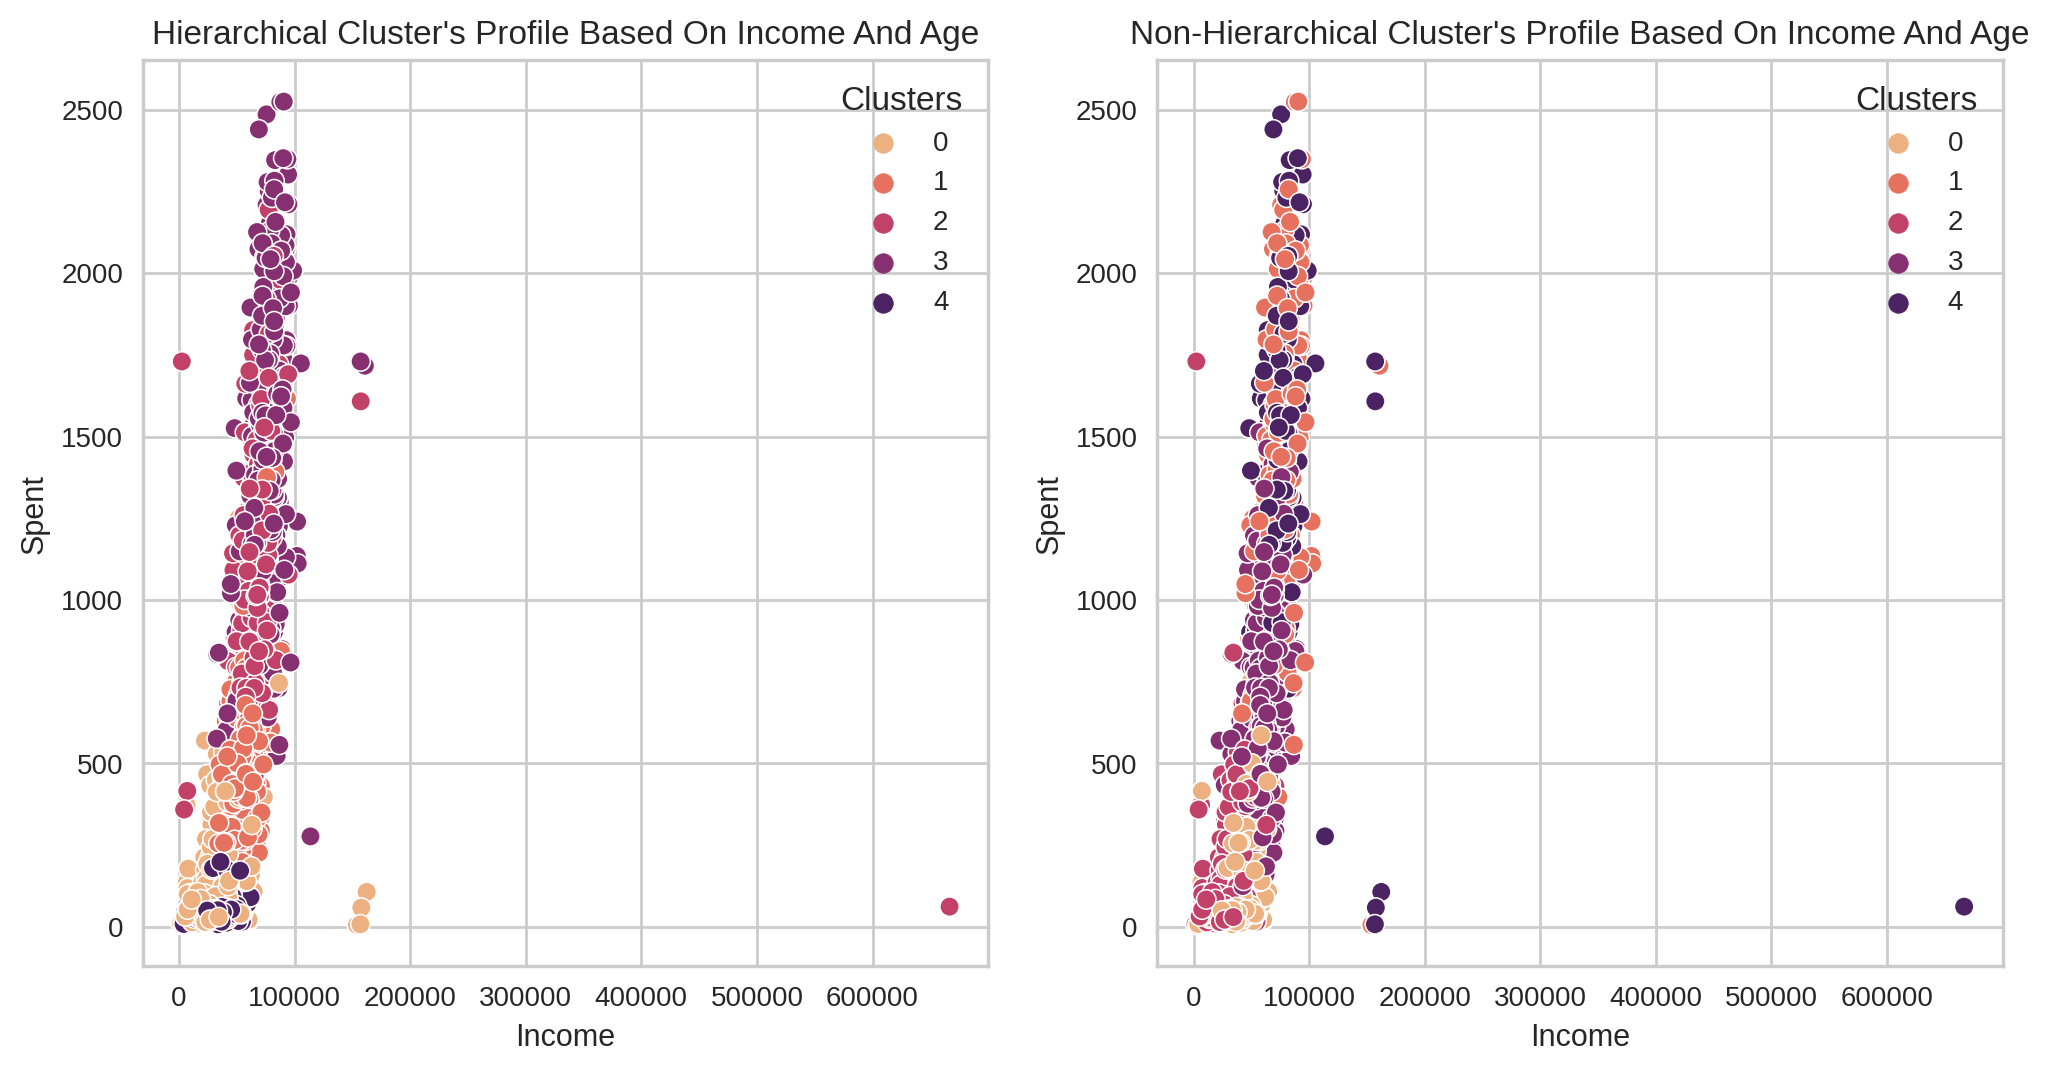

In [ ]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Income',y='Spent',data=data_hier_clust,hue='Clusters', palette='flare').set_title("Hierarchical Cluster's Profile Based On Income And Age")

plt.subplot(1,2,2)
sns.scatterplot(x='Income',y='Spent',data=data_nonhier_clust,hue='Clusters', palette='flare').set_title("Non-Hierarchical Cluster's Profile Based On Income And Age")

Text(0.5, 1.0, "Non-Hierarchical Cluster's Profile Based On Income And Spent")

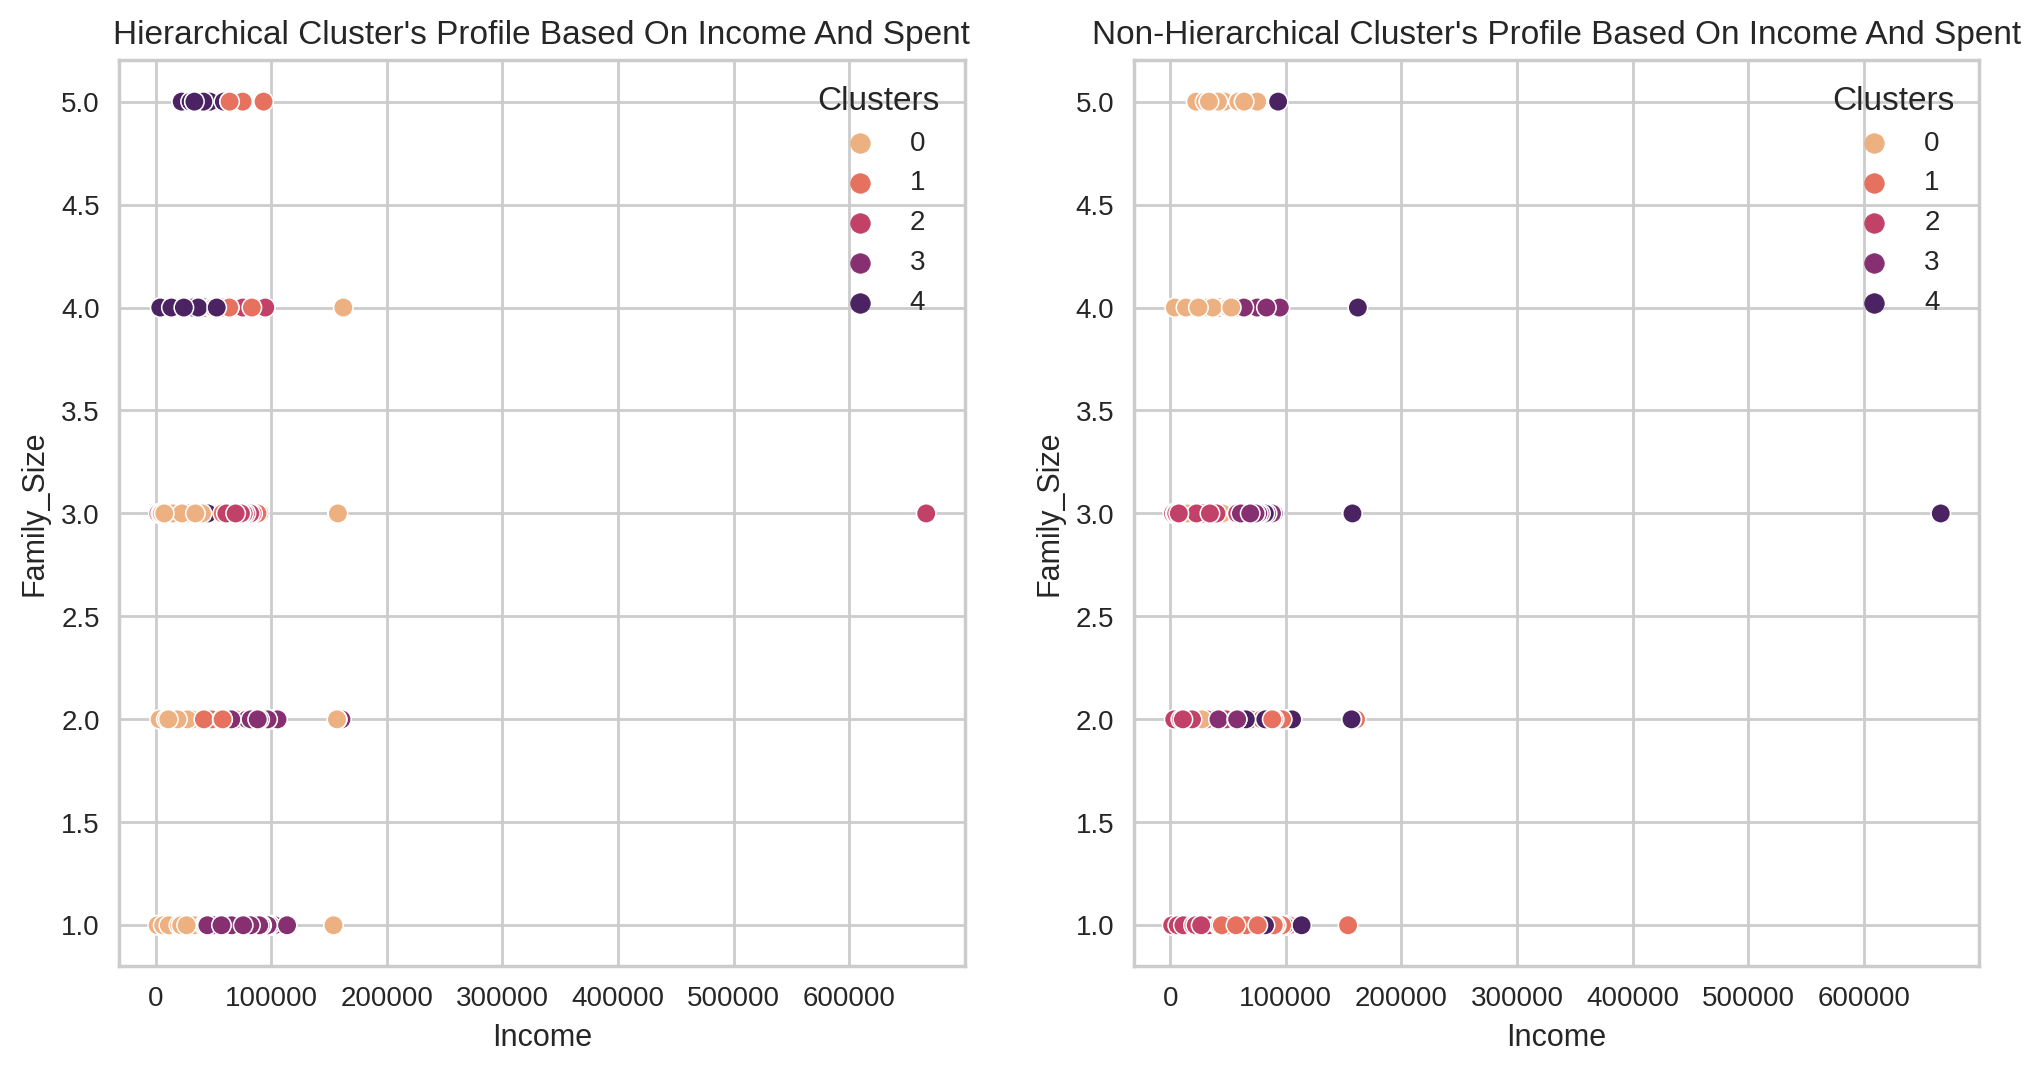

In [ ]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Income',y='Family_Size',data=data_hier_clust,hue='Clusters', palette='flare').set_title("Hierarchical Cluster's Profile Based On Income And Spent")

plt.subplot(1,2,2)
sns.scatterplot(x='Income',y='Family_Size',data=data_nonhier_clust,hue='Clusters', palette='flare').set_title("Non-Hierarchical Cluster's Profile Based On Income And Spent")

Text(0.5, 1.0, "Non-Hierarchical Cluster's Profile Based On Income And Spent")

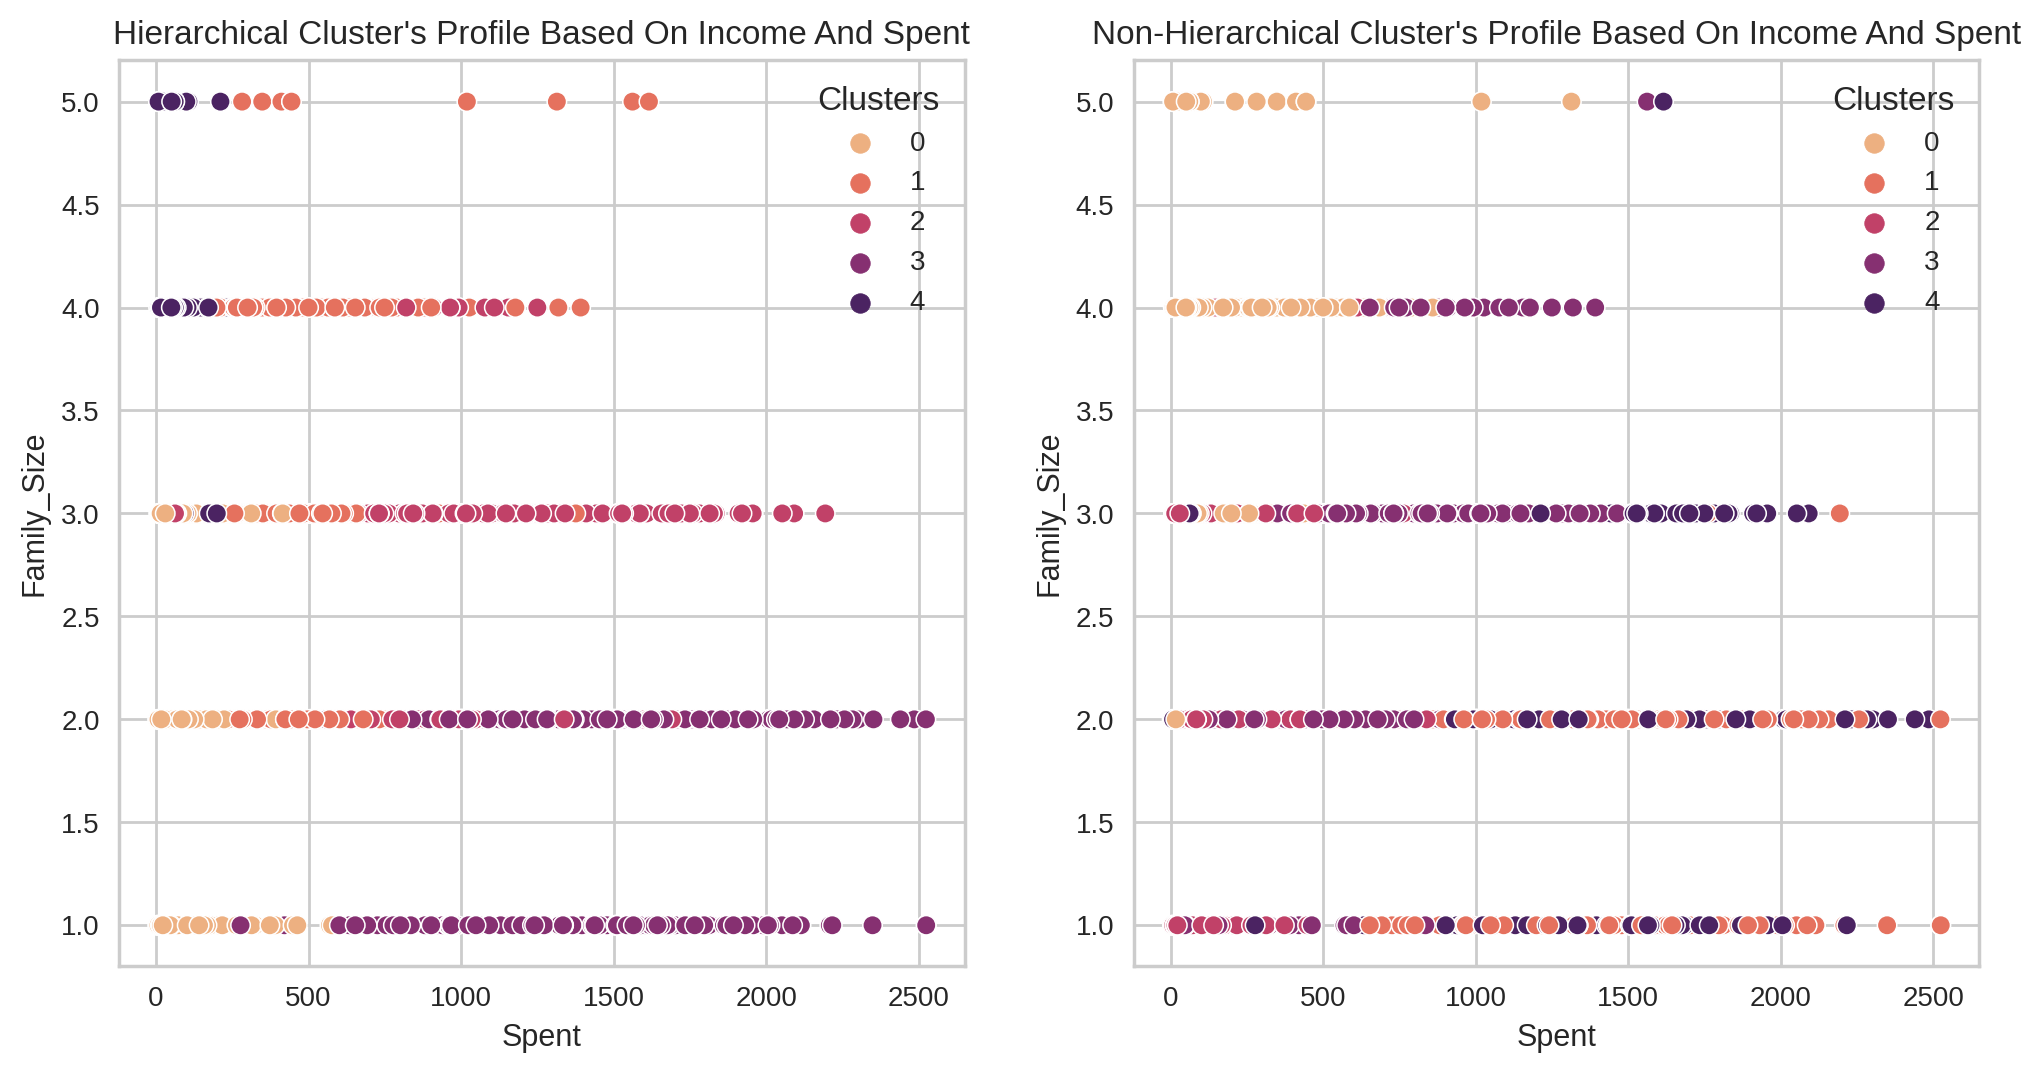

In [ ]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='Spent',y='Family_Size',data=data_hier_clust,hue='Clusters', palette='flare').set_title("Hierarchical Cluster's Profile Based On Income And Spent")

plt.subplot(1,2,2)
sns.scatterplot(x='Spent',y='Family_Size',data=data_nonhier_clust,hue='Clusters', palette='flare').set_title("Non-Hierarchical Cluster's Profile Based On Income And Spent")

#### **Between Cluster**

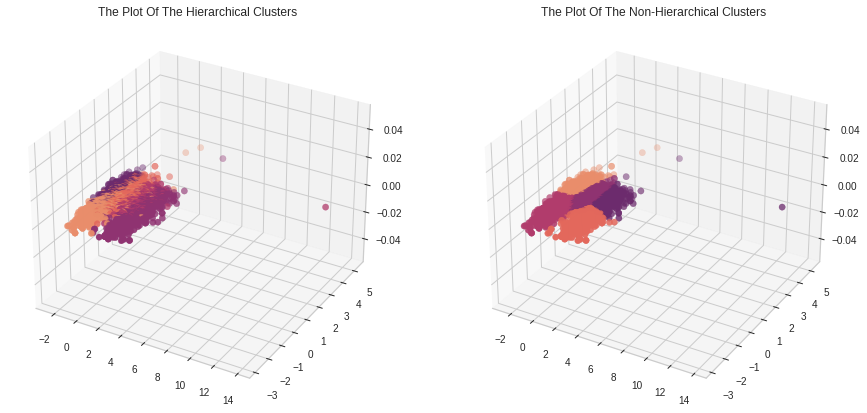

In [ ]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1 = plt.subplot(121, projection='3d', label="bla")
ax1.scatter(x, y, s=40, c=data_hier_clust["Clusters"], marker='o', cmap = cmap )

ax1.set_title("The Plot Of The Hierarchical Clusters")

ax2 = plt.subplot(122, projection='3d', label="bla")
ax2.scatter(x, y, s=40, c=data_nonhier_clust["Clusters"], marker='o', cmap = cmap )

ax2.set_title("The Plot Of The Non-Hierarchical Clusters")

plt.show()